<h1 style="font-family:Georgia;color:#16235A";> <left>📚 【GoDaddy 1/5】TRY FIND EVERYTHING:Ouliers &amp; ChangePoints 📚</left> </h1>

### <h1 style="font-family: 'Georgia', serif;font-weight: bold;margin: 2rem 0 1rem 0;line-height: 1.2;color: #16235A;">Table of contents</h1><a class='anchor' id='top'></a>
    
    
<li style="margin-left: 1.5rem;margin-bottom: 0.5rem;color:#0444BF;"> <a href="#import" style="color: #0444BF;text-decoration: none;border-bottom: 1px solid #0444BF;font-size:16px;">Import libraries</a></li> 
<li style="margin-left: 1.5rem;margin-bottom: 0.5rem;color:#0444BF;"> <a href="#load" style="color: #0444BF;text-decoration: none;border-bottom: 1px solid #0444BF;;font-size:16px;">Loading Data</a></li> 
<li style="margin-left: 1.5rem;margin-bottom: 0.5rem;color:#0444BF;"> <a href="#befStart" style="color: #0444BF;text-decoration: none;border-bottom: 1px solid #0444BF;;font-size:16px;">Before Start</a></li> 
<li style="margin-left: 1.5rem;margin-bottom: 0.5rem;color:#0444BF;"> <a href="#load" style="color: #0444BF;text-decoration: none;border-bottom: 1px solid #0444BF;;font-size:16px;">Load data</a></li> 
<li style="margin-left: 1.5rem;margin-bottom: 0.5rem;color:#0444BF;"> <a href="#cusDif" style="color: #0444BF;text-decoration: none;border-bottom: 1px solid #0444BF;;font-size:16px;">Custom Detections</a></li> 
<li style="margin-left: 1.5rem;margin-bottom: 0.5rem;color:#0444BF;"> <a href="#chotest" style="color: #0444BF;text-decoration: none;border-bottom: 1px solid #0444BF;;font-size:16px;">CHOW TEST</a></li> 
<li style="margin-left: 1.5rem;margin-bottom: 0.5rem;color:#0444BF;"> <a href="#arima" style="color: #0444BF;text-decoration: none;border-bottom: 1px solid #0444BF;;font-size:16px;">ARIMA TEST</a></li> 
<li style="margin-left: 1.5rem;margin-bottom: 0.5rem;color:#0444BF;"> <a href="#more" style="color: #0444BF;text-decoration: none;border-bottom: 1px solid #0444BF;;font-size:16px;">WHAT'S MORE?</a></li> 
 
<div class="alert alert-block alert-warning">  
<b>Note:</b> This is a work in progress ⚠️
</div>

### <h1 style="font-family: 'Georgia', serif;font-weight: bold;margin: 2rem 0 1rem 0;line-height: 1.2;color: #16235A;">Goals For This Notebook</h1><a class='anchor' id='top'></a>

<p style="font-size:18px; font-family:Georgia; line-height: 1.5em;color:#6975A6;">
   Change point and outlier detection are important techniques for time series analysis because they can help identify significant changes or abnormalities in the data. Time series data often exhibit non-stationarity, meaning that the statistical properties of the data change over time. These changes can be due to various factors, such as shifts in underlying trends, changes in the distribution of the data, or the occurrence of rare events or anomalies. Change point detection can help identify when these changes occur and can provide insights into the underlying causes of the changes.The main objective of this article is to do my best to identify all anomalous situations in the time series.
    <br><br>
    The main objective of this article is to do my best to identify all anomalous situations in the time series. To my knowledge, the current exceptional values in the time series are as follows:
     <br><br>
    <li style="margin-left: 1.5rem;font-family:Georgia; margin-bottom: 2rem;font-size:18px;color:#6975A6;"> <b style='color:#16235A'>Innovational outlier (IO)</b> - this type of outlier causes interference not only to X(T), but also affects all observation values in the sequence after time T.</li > 
    <li style="margin-left: 1.5rem;font-family:Georgia; margin-bottom: 2rem;font-size:18px;color:#6975A6;"> <b style='color:#16235A'>Additive outlier (AO)</b> - this type of outlier causes interference that only affects the sequence value at the time T when the interference occurs, and does not affect the sequence values after that time.</li> 
    <li style="margin-left: 1.5rem;font-family:Georgia; margin-bottom: 2rem;font-size:18px;color:#6975A6;"> <b style='color:#16235A'>Level shift (LS)</b> - this type of outlier causes interference when the system structure changes at a certain time T, and continues to affect all behaviors after time T. On the sequence, it often shows a horizontal displacement of the mean value of the sequence before and after time T.</li> 
    <li style="margin-left: 1.5rem;font-family:Georgia; margin-bottom: 2rem;font-size:18px;color:#6975A6;"> <b style='color:#16235A'> Temporary change (TC)</b> - this type of outlier causes interference with a certain initial effect when it occurs at time T, and then exponentially decays over time based on the size of the attenuation factor.</li> 




<h1 style="font-family: 'Georgia', serif;font-weight: bold;margin: 2rem 0 1rem 0;line-height: 1.2;color: #16235A;">Import libraries  <a class='anchor' id='import'></a><a href="#top"> ↑</a></h1>
    

In [1]:
# google黄色#F4B400


import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import gc
from tqdm import tqdm, trange
import time
import random;
from statsmodels.tsa.arima.model import ARIMA
from fbprophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.regression.linear_model import OLS
import ruptures as rpt
from changefinder import ChangeFinder 
from scipy.stats import f as stsf
import statsmodels.api as sm
from sklearn.neighbors import LocalOutlierFactor
from typing import List, Tuple
from builtins import NotImplementedError
from changefinder import ChangeFinder 




<h1 style="font-family: 'Georgia', serif;font-weight: bold;margin: 2rem 0 1rem 0;line-height: 1.2;color: #16235A;">Loading Data  <a class='anchor' id='load'></a><a href="#top"> ↑</a></h1>
    

In [2]:
'''*************PATHS********************'''

root_path = 'D:/COMPETITIONS/Kag_Godaddy/'
Dpath = root_path + 'data/'
cache_path = root_path + 'cache/'
sub_path = root_path + 'submit/'
FeatPath = root_path +  'tsfreshFea/'

'''*************Loading********************'''
train = pd.read_csv(Dpath+'train.csv')
train["first_day_of_month"] = pd.to_datetime(train["first_day_of_month"])
revealed_test = pd.read_csv(Dpath+'revealed_test.csv')
train = pd.concat( [train,revealed_test],axis=0 )
train = train.sort_values(['cfips','first_day_of_month']).reset_index(drop=True)
test = pd.read_csv( Dpath + 'test.csv'  )
test["first_day_of_month"] = pd.to_datetime(test["first_day_of_month"])
test = test.sort_values(['cfips','first_day_of_month']).reset_index(drop=True)
test['microbusiness_density'] = np.nan
df = train[['cfips','county','state']].drop_duplicates()
test = test.merge(df ,how='left',on=['cfips'])
test = test[test.row_id.isin( revealed_test.row_id )==False].reset_index(drop=True)



D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  


<h1 style="font-family: 'Georgia', serif;font-weight: bold;margin: 2rem 0 1rem 0;line-height: 1.2;color: #16235A;">Help Function  <a class='anchor' id='hlpFuc'></a><a href="#top"> ↑</a></h1>

In [3]:


'''*************CUSTOM Oulier Detection Funtion ********************'''

def CusOulierDet(ts: List[float], threshold: float = -3.5) -> Tuple[List[List[float]], List[int]]:
    """
    This function detects outliers in a time series and splits it into multiple segments for further processing.
    :param ts: The time series data.
    :param threshold: The threshold for the outlier score. Default is -3.5.
    :return: A list of all segments and a list of the split points.
    """
    # Calculate the differences between consecutive values in the time series
    differences = [ts[i+1] - ts[i] for i in range(len(ts)-1)]
    # Convert the differences into a two-dimensional array
    X = [[val] for val in differences]

    # Create the Local Outlier Factor (LOF) model and set hyperparameters and algorithm parameters
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05, novelty=True)

    # Train the model and get the outlier scores for each data point
    lof.fit(X)
    scores = lof.negative_outlier_factor_

    # Identify the positions of the outliers
    anomalies = []
    for i, score in enumerate(scores):
        if score < threshold:
            anomalies.append(i+1)

    # If there are no outliers, return the original time series and an empty list of split points
    if not anomalies:
        return [ts], []

    # Split the original time series into segments based on the positions of the outliers and record the split points
    segments = []
    split_points = []
    start_idx = 0
    for anomaly in anomalies:
        segments.append(ts[start_idx:anomaly])
        split_points.append(anomaly)
        start_idx = anomaly

    # Add the final segment to the list of segments
    segments.append(ts[start_idx:])

    # Return the list of segments and the list of split points
    return segments, split_points

'''*************CUSTOM Plot setting for bar and line plots ********************'''

def MyPlots(x, 
            y,
            barOrLine,
            title='',
            SeriselableName='',
            x_label='', 
            y_label='',
            main_title='',
           **kwargs):
    condictions = {}
    condictions.update(kwargs)
    print('\n\n')
    
    f, ax = plt.subplots(figsize=(18, 5))

    ax.set_title(main_title, fontname='Ubuntu', fontsize=25,
                 fontstyle='italic', fontweight='bold',
                 color='#16235A', loc='left', y=1.2, pad=-14)
    ax.text(0, 1.05, title,
            transform=ax.transAxes, 
            style='italic', fontweight='bold', fontsize=16, color='#6975A6')

    ax.tick_params(color='green', labelcolor='#525B56')
    for spine in ['right', 'top','left', 'bottom']:
        ax.spines[spine].set_visible(False)
        ax.spines[spine].set_edgecolor('#2A3457')

    ax.grid(which="major", color="lightgrey", linestyle="-",  linewidth=0.5, alpha=0.5)
    
    if barOrLine=='line':
        plt.plot(x, y, '-o', color="#4285F4",
                 markeredgecolor='#4285F4',
                 linewidth=2.5,
                 markerfacecolor='#4285F4', label=SeriselableName)
        if len(condictions)>0:
            sec_seri_k = ['serise1','color1','lableName1']
            for v in sec_seri_k:
                if v not in condictions.keys():
                    raise ValueError(f'Please set {v} parameter')
            if len(x)!= len(condictions['serise1']):
                raise ValueError(f'Length mismatch:new serise length should be {len(x)}')
            plt.plot(x, condictions['serise1'], '-o', color=condictions['color1'],
                 markeredgecolor=condictions['color1'],
                 linewidth=2.5,
                 markerfacecolor=condictions['color1'], label=condictions['lableName1'])
    elif barOrLine=='bar':
        plt.bar(x, y, color="#3A98B9",
                edgecolor='#3A98B9',
                linewidth=2.5,
                label=SeriselableName)
        if len(condictions)>0:
            sec_seri_k = ['serise1','color1','lableName1']
            for v in sec_seri_k:
                if v not in condictions.keys():
                    raise ValueError(f'Please set {v} parameter')
            if len(x)!= len(condictions['serise1']):
                raise ValueError(f'Length mismatch:new serise length should be {len(x)}')
            plt.bar(x, condictions['serise1'], condictions['color1'],
                edgecolor=condictions['color1'],
                linewidth=2.5,
                label=condictions['lableName1'])
    else:
        raise NotImplementedError(f"{barOrLine} plot is not implemented yet.")
        
    addY = np.std(y)*2 if np.std(y)>0 else 0.02*y
    plt.legend(loc='upper right')
    plt.ylim(min(y)-addY/2, max(y)+addY)
#     plt.ylim(0, max(y)+addY)
    plt.ylabel(y_label, size=16, color='#6975A6', labelpad=8)
    plt.xlabel(x_label, size=16, color='#6975A6', labelpad=8)
    
    return plt



    
'''*************chow_test for given breakpoint ********************'''

def chow_test(y, x, breakpoint):
    # Add a column for the intercept
    x = sm.add_constant(x)

    # Fit a linear regression model using OLS
    model_full = sm.OLS(y, x)
    results_full = model_full.fit()

    # Split the data into two parts
    x_left, x_right = x[:breakpoint], x[breakpoint:]
    y_left, y_right = y[:breakpoint], y[breakpoint:]

    # Fit linear regression models for each part
    model_left = sm.OLS(y_left, x_left)
    model_right = sm.OLS(y_right, x_right)

    # Compute the Chow test statistic and p-value
    chow_num = (results_full.ssr - (model_left.fit().ssr + model_right.fit().ssr)) / 2
    chow_denom = (model_left.fit().ssr + model_right.fit().ssr) / (len(y_left) + len(y_right) - 4)
    chow_stat = chow_num / chow_denom
    p_value = 1 - stsf.cdf(chow_stat, 2, len(y_left) + len(y_right) - 4)
    return p_value


    
'''*************change finder| score_cdf, detect ********************'''
def score_changeFinder(ts, r, order, smooth):
    '''
       r: Discounting rate
       order: AR model order
       smooth: smoothing window size T
    '''
    cf = ChangeFinder(r=r, order=order, smooth=smooth)
    ts_score = [cf.update(p) for p in ts]
    
    return ts_score

def score_changeFinder(ts, r, order, smooth):
    '''
       r: Discounting rate
       order: AR model order
       smooth: smoothing window size T
    '''
    cf = ChangeFinder(r=r, order=order, smooth=smooth)
    ts_score = [cf.update(p) for p in ts]
    
    return ts_score


def plotChangePoints_changeFinder(df, ts, ts_score, title):
        
    fig, ax1 = plt.subplots(figsize=(16,4))
    ax2 = ax1.twinx()
    ax1.plot(df.index, ts)
    ax2.plot(df.index, ts_score, color='red')
    
    ax1.set_ylabel('item sale')
    ax1.grid(axis='x', alpha=0.7)
    
    ax2.set_ylabel('CP Score')
    ax2.set_title(title)
    plt.show()
    


<h1 style="font-family: 'Georgia', serif;font-weight: bold;margin: 2rem 0 1rem 0;line-height: 1.2;color: #16235A;">Before Start  <a class='anchor' id='befStart'></a><a href="#top"> ↑</a></h1>

<p style="font-size:18px; font-family:Georgia; line-height: 1.5em;color:#6975A6;">
   Before we start, I would like to point out the issue with the data. Specifically, the calculation of microbusiness_density is derived by dividing active by the lagged adult population of two periods. Therefore, because the denominator remains the same value for each year while the years themselves are different, it creates a false impression of a cyclical pattern in the microbusiness_density data. As a result, I need to process the microbusiness_density data.
<p style="font-size:18px; font-family:Georgia; line-height: 1.5em;color:#6975A6;">
  Next, I will present a brief analysis and demonstration of several patterns of concentrated time series outliers and the potential negative effects they may have.
    <br><br>

<h2 style="font-family: 'Georgia', serif;font-weight: bold;margin: 2rem 0 1rem 0;line-height: 1.2;color: #16235A;">Process microbusiness_density</h2>

In [4]:
COLS = ['GEO_ID','NAME','S0101_C01_026E']
for ye in [2017,2018,2019,2020,2021]:
    df_puputation = pd.read_csv(Dpath + f'ACSST/ACSST5Y{ye}.S0101-Data.csv',usecols=COLS)
    df_puputation = df_puputation.iloc[1:]
    df_puputation['S0101_C01_026E'] = df_puputation['S0101_C01_026E'].astype('int')
    df_puputation['cfips'] = df_puputation.GEO_ID.apply(lambda x: int(x.split('US')[-1]) )
    df_puputation = df_puputation.set_index('cfips').S0101_C01_026E.to_dict()
    train[f'adult{ye}'] = train.cfips.map(df_puputation)
    del df_puputation
train['old_mbd'] = train['microbusiness_density']
train['year'] = train.row_id.map(lambda x: int(x[-10:-6]) )
for ye in [2017,2018,2019,2020]:
    train.loc[train.year==ye+2,
      'microbusiness_density'] = train.loc[train.year==ye+2,
      'microbusiness_density']*train.loc[train.year==ye+2,f'adult{ye}']/train.loc[train.year==ye+2,'adult2021']
gc.collect()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (102) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


653

<h3 style="font-family: 'Georgia', serif;font-weight: bold;margin: 2rem 0 1rem 0;line-height: 1.2;color: #16235A;">Take look at some processed cfip serise</h3>

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


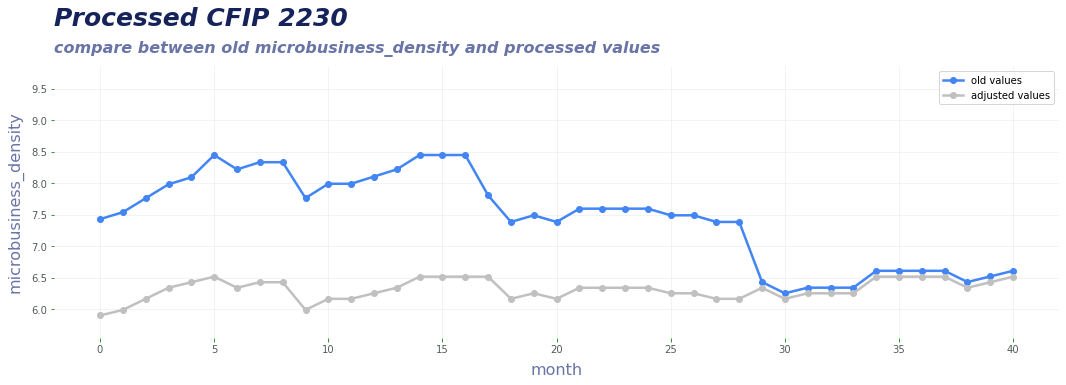

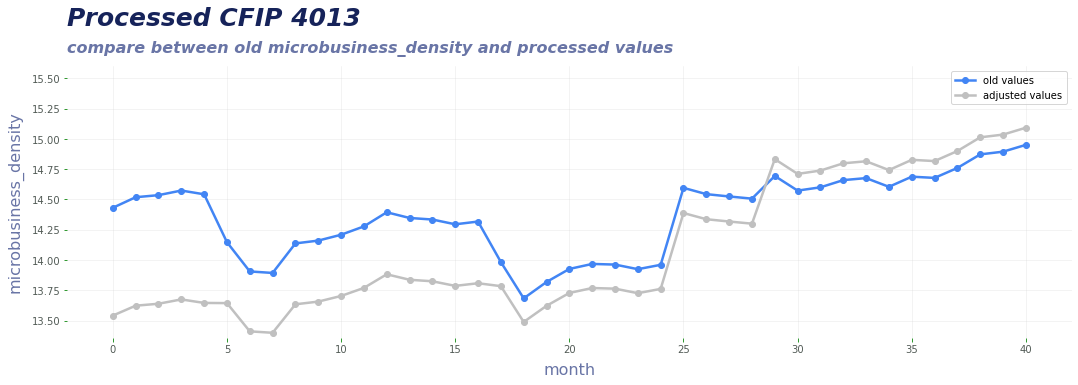

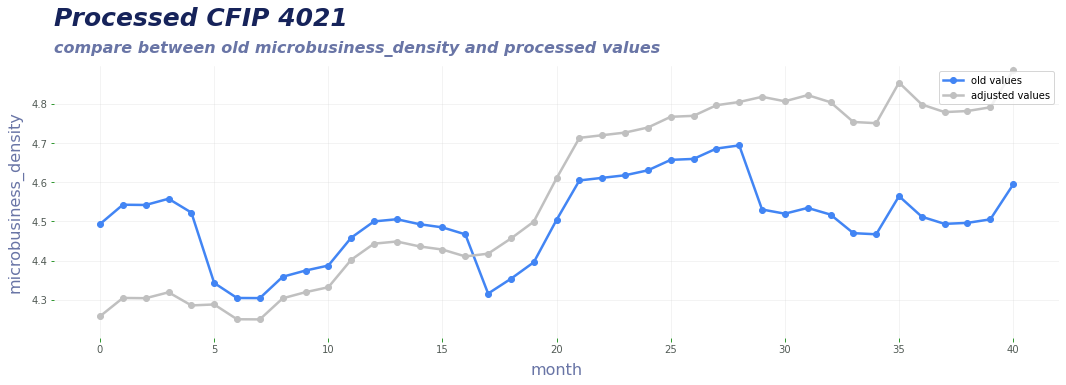

In [5]:

for cfip in [2230,4013,4021]:
    new_val = train[train.cfips==cfip].microbusiness_density.values
    old_val = train[train.cfips==cfip].old_mbd.values

    pltObj = MyPlots(x=np.arange(len(old_val)), y=old_val,barOrLine='line',
                     title='compare between old microbusiness_density and processed values',
                     SeriselableName='old values',
                     x_label='month', y_label='microbusiness_density',
                     main_title=f'Processed CFIP {cfip}',
                     serise1  = new_val,
                     color1  ='silver',
                     lableName1 = 'adjusted values'
#                      serise1
                    )
    pltObj.show()

<br>
<h2 style="font-family: 'Georgia', serif;font-weight: bold;margin: 2rem 0 1rem 0;line-height: 1.2;color: #16235A;">Types of Outlier Examples</h2>

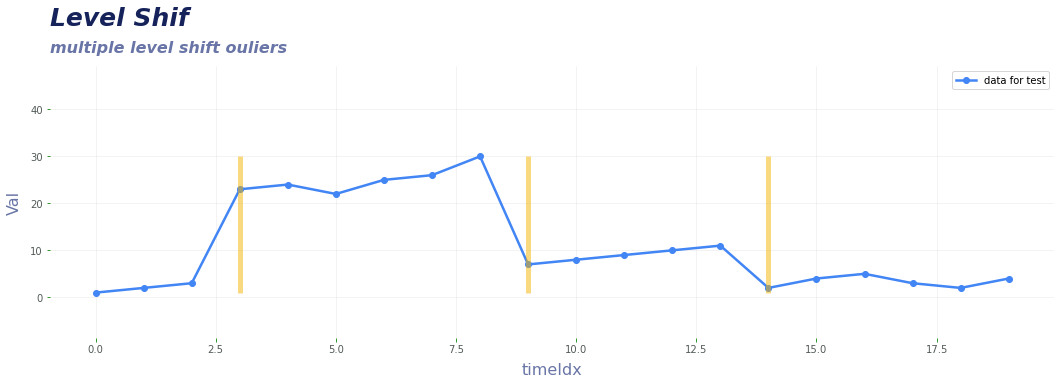

In [6]:

tsval = np.array([1, 2, 3, 23,24,22, 25,26, 30, 7, 8, 9, 10,11, 2,4,5,3,2, 4])
ts = np.arange(len(tsval))
pltObj = MyPlots(x=ts, y=tsval,barOrLine='line',
                 title='multiple level shift ouliers',
                 SeriselableName='data for test',
                 x_label='timeIdx', y_label='Val',
                 main_title='Level Shif')
min_ =  tsval.min()
max_ =  tsval.max()
level_change_idx = [3,9,14]
pltObj.vlines(level_change_idx , ymin=min_ ,ymax= max_, linewidth=5,color='#F4B400', alpha=0.5)
pltObj.show()


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.3em;">
     &nbsp;
<p style="font-size:18px; font-family:Georgia; line-height: 1.5em;color:#6975A6;">
📌The time series has been segmented into 4 sections with different mean levels. The beginning of each segment is an outlier for the preceding time period. These are not like typical outlier points, but rather a jump in the current value that maintains a certain level for a period of time. Such a situation makes historical data less useful as a reference for future predictions, as the segment appears more like a section from another sequence than its own. As a result, pattern learning becomes difficult
    <br><br>
</div>



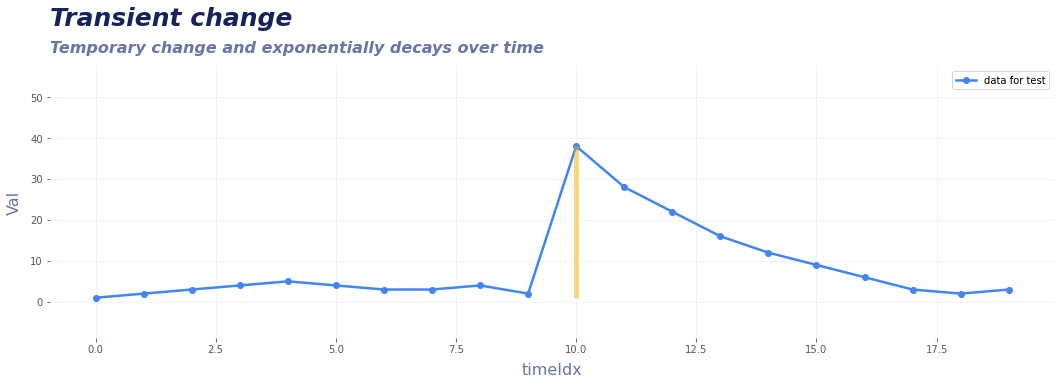

In [7]:

tsval = np.array([1, 2, 3, 4,5,4,3,3,4,2,38,28,22,16,12,9,6,3,2,3])
ts = np.arange(len(tsval))
pltObj = MyPlots(x=ts, y=tsval,barOrLine='line',
                 title='Temporary change and exponentially decays over time ',
                 SeriselableName='data for test',
                 x_label='timeIdx', y_label='Val',
                 main_title='Transient change')
min_ =  tsval.min()
max_ =  tsval.max()
level_change_idx = [10]
pltObj.vlines(level_change_idx , ymin=min_ ,ymax= max_, linewidth=5,color='#F4B400', alpha=0.5)
pltObj.show()



<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.3em;">
     &nbsp;
<p style="font-size:18px; font-family:Georgia; line-height: 1.5em;color:#6975A6;">
📌A temporary increase followed by a decline back to the previous state can significantly alter the pattern within a certain range that is affected by it. For instance, the previous pattern may have been a stable variation, but during this period, it rapidly declined. Clearly, it would be very difficult to predict this decline using historical data from the stable period. Similarly, after the decline ends, future predictions can also be disrupted by this anomaly in modeling. Therefore, it is essential to monitor whether such sudden increases are permanent or will decline in the future.
    <br><br>
</div>


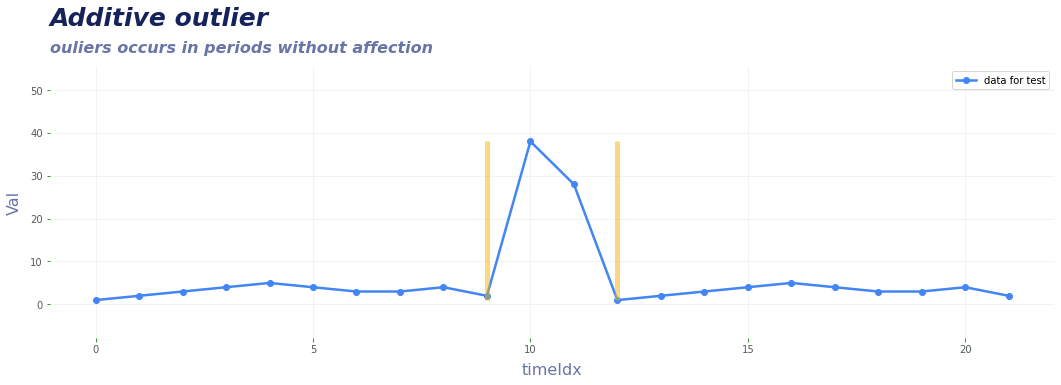

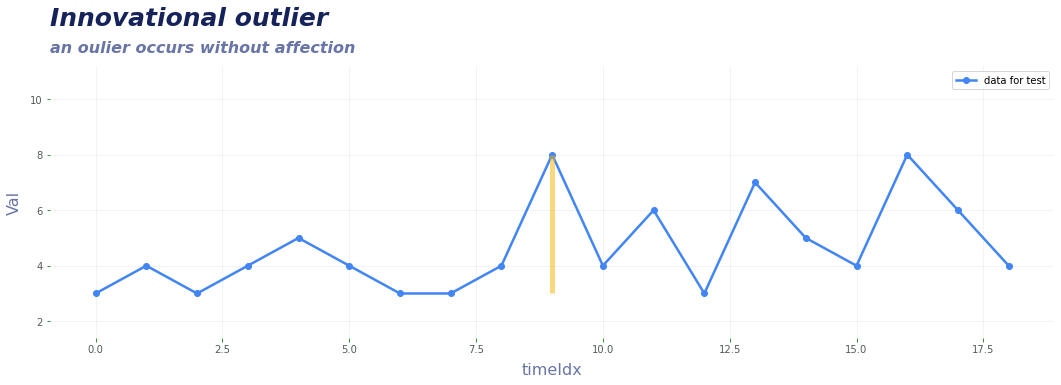

In [8]:
# Innovational outlier
# Additive outlier


tsval = np.array([1, 2, 3, 4,5,4,3,3,4,2,38,28,1, 2, 3, 4,5,4,3,3,4,2])
ts = np.arange(len(tsval))
pltObj = MyPlots(x=ts, y=tsval,barOrLine='line',
                 title='ouliers occurs in periods without affection ',
                 SeriselableName='data for test',
                 x_label='timeIdx', y_label='Val',
                 main_title='Additive outlier')
min_ =  tsval.min()
max_ =  tsval.max()
level_change_idx = [9,12]
pltObj.vlines(level_change_idx , ymin=min_ ,ymax= max_, linewidth=5,color='#F4B400', alpha=0.5)
pltObj.show()

tsval = np.array([ 3, 4, 3, 4,5,4,3,3,4,8, 4, 6, 3, 7,5,4,8,6,4])
ts = np.arange(len(tsval))
pltObj = MyPlots(x=ts, y=tsval,barOrLine='line',
                 title='an oulier occurs without affection ',
                 SeriselableName='data for test',
                 x_label='timeIdx', y_label='Val',
                 main_title='Innovational outlier')
min_ =  tsval.min()
max_ =  tsval.max()
level_change_idx = [9]
pltObj.vlines(level_change_idx , ymin=min_ ,ymax= max_, linewidth=5,color='#F4B400', alpha=0.5)
pltObj.show()

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.3em;">
     &nbsp;
<p style="font-size:18px; font-family:Georgia; line-height: 1.5em;color:#6975A6;">
📌These two situations are relatively simple because they have limited or no impact on the other parts of the sequence. In most cases, we can simply remove them or replace them with surrounding values. It is worth noting that detecting anomalies in segments is more difficult than detecting anomalies in individual points
    <br><br>
</div>


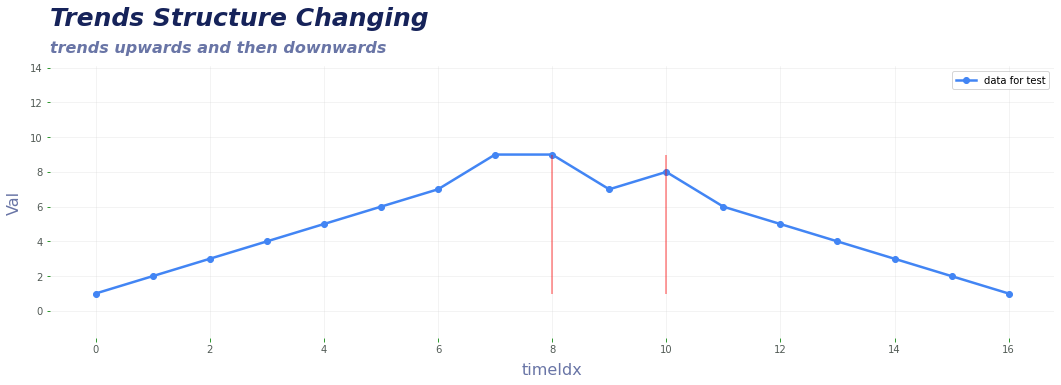

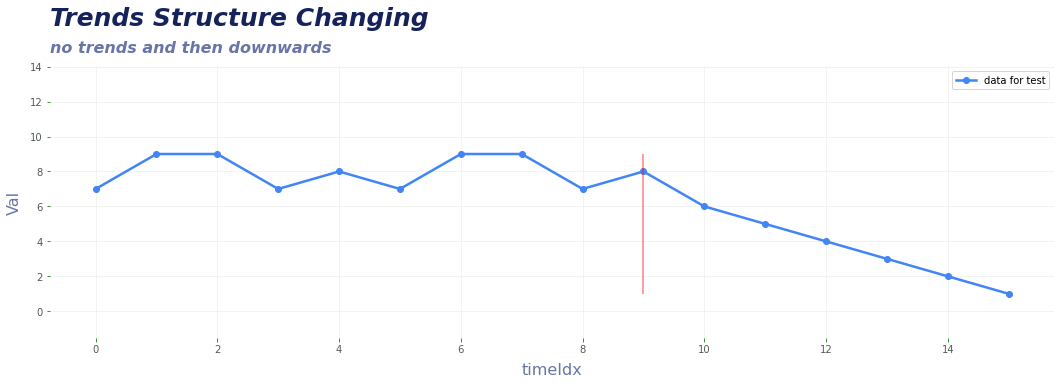

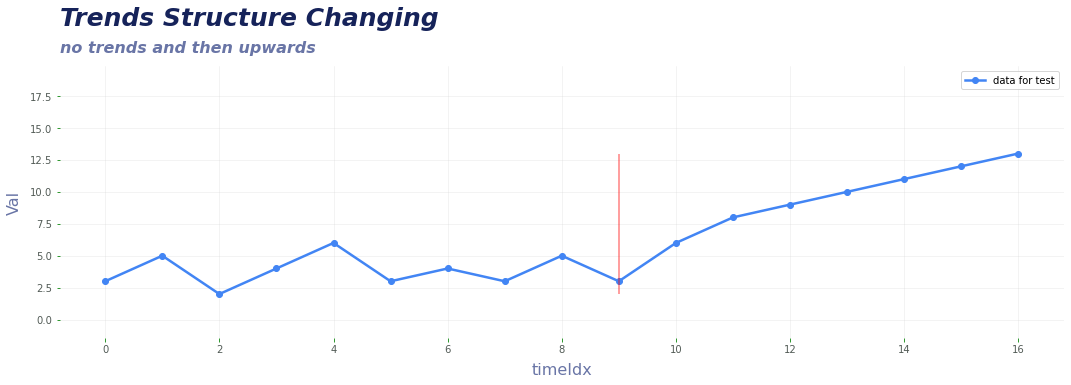

In [9]:
tsval = np.array([1, 2, 3, 4,5,6,7,9,9,7,8,6,5,4,3,2,1])
ts = np.arange(len(tsval))
pltObj = MyPlots(x=ts, y=tsval,barOrLine='line',
                 title='trends upwards and then downwards ',
                 SeriselableName='data for test',
                 x_label='timeIdx', y_label='Val',
                 main_title='Trends Structure Changing')
min_ =  tsval.min()
max_ =  tsval.max()
level_change_idx = [8,10]
pltObj.vlines(level_change_idx , ymin=min_ ,ymax= max_, color='red', alpha=0.5)
pltObj.show()


tsval = np.array([7,9,9,7,8,7,9,9,7,8,6,5,4,3,2,1])
ts = np.arange(len(tsval))
pltObj = MyPlots(x=ts, y=tsval,barOrLine='line',
                 title='no trends and then downwards ',
                 SeriselableName='data for test',
                 x_label='timeIdx', y_label='Val',
                 main_title='Trends Structure Changing')
min_ =  tsval.min()
max_ =  tsval.max()
level_change_idx = [9]
pltObj.vlines(level_change_idx , ymin=min_ ,ymax= max_, color='red', alpha=0.5)
pltObj.show()

tsval = np.array([3,5,2,4,6,3,4,3,5,3,6,8,9,10,11,12,13])
ts = np.arange(len(tsval))
pltObj = MyPlots(x=ts, y=tsval,barOrLine='line',
                 title='no trends and then upwards ',
                 SeriselableName='data for test',
                 x_label='timeIdx', y_label='Val',
                 main_title='Trends Structure Changing')
min_ =  tsval.min()
max_ =  tsval.max()
level_change_idx = [9]
pltObj.vlines(level_change_idx , ymin=min_ ,ymax= max_, color='red', alpha=0.5)
pltObj.show()

<br>
<h1 style="font-family: 'Georgia', serif;font-weight: bold;margin: 2rem 0 1rem 0;line-height: 1.2;color: #16235A;">Custom Detections   <a class='anchor' id='cusDif'></a><a href="#top"> ↑</a></h1>
    

<p style="font-size:18px; font-family:Georgia; line-height: 1.5em;color:#6975A6;">
The following detection method is a custom anomaly detection method. It uses LOF detection on the differential sequence to find the outlier values and locate them. This method can detect a variety of anomalies, including IO, AO, LS, TC. However, there may be some inaccuracies in the localization, and it is necessary to combine it with other methods for more accurate results.
    <br><br>



change points dectected by custom methods:[1, 7, 8, 18, 25]

 setments splited by detected points:[array([2.03610631]), array([2.1848395 , 2.15406713, 2.19509695, 2.22586942, 2.22074056,
       2.1745819 ]), array([1.86685822]), array([2.18996829, 2.21048324, 2.2156118 , 2.23612675, 2.27202779,
       2.25664171, 2.30792893, 2.30280037, 2.29254274, 2.28228527]), array([2.0053338 , 1.97969025, 1.97456152, 1.99507634, 2.0053338 ,
       2.0053338 , 2.03610629]), array([2.29767146, 2.24638415, 2.24125563, 2.24125563, 2.20022569,
       2.18996816, 2.21561178, 2.24638426, 2.2412555 , 2.2412555 ,
       2.27715675, 2.23612673, 2.23099817, 2.21048301, 2.2412555 ,
       2.26689912])]








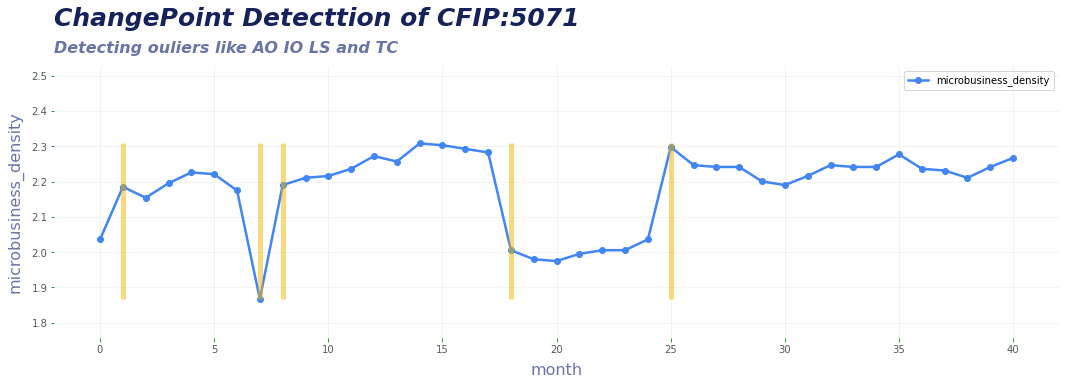

In [10]:
cfip = 5071
df = train[train.cfips==cfip].microbusiness_density.values
segms,split_points = CusOulierDet(df)
print(
f'\n\nchange points dectected by custom methods:{split_points}\n\n',
f'setments splited by detected points:{segms}\n\n\n'
)


pltObj = MyPlots(x=range(len(df)), y=df,barOrLine='line',
                 title='Detecting ouliers like AO IO LS and TC ',
                 SeriselableName='microbusiness_density',
                 x_label='month', y_label='microbusiness_density',
                 main_title=f'ChangePoint Detecttion of CFIP:{cfip}')
min_ =  df.min()
max_ =  df.max()
pltObj.vlines(split_points , ymin=min_ ,ymax= max_,linewidth=5,color='#F4B400', alpha=0.5)
pltObj.show()

<br>
<p style="font-size:18px; font-family:Georgia; line-height: 1.5em;color:#6975A6;">
    <br>
<b>that's check out more examples</b>
    <br><br>



change points dectected by custom methods:[1]

 setments splited by detected points:[array([1.55665316]), array([1.78491251, 1.8822033 , 1.8822033 , 1.87097734, 1.82233207,
       1.72504118, 1.7325251 , 1.72129912, 1.70258941, 1.69884745,
       1.71007333, 1.69884745, 1.72129912, 1.74749285, 1.72504118,
       1.71007333, 1.68762161, 1.57910486, 1.58658882, 1.6090405 ,
       1.62400841, 1.6090405 , 1.64646009, 1.64646009, 1.63897613,
       1.6352343 , 1.57162109, 1.60529866, 1.57910488, 1.55665319,
       1.58658881, 1.58284685, 1.59033078, 1.60155658, 1.63897622,
       1.68762167, 1.70258944, 1.68013774, 1.67265381, 1.62400836])]








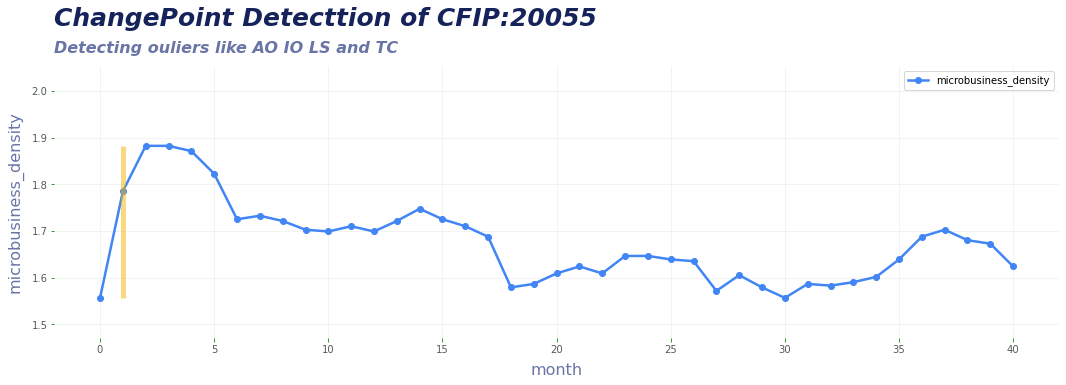



change points dectected by custom methods:[1, 18]

 setments splited by detected points:[array([5.41740678]), array([5.15337708, 5.09817091, 4.96135557, 4.85814394, 4.83894182,
       4.76693374, 4.73333   , 4.7597333 , 4.81493942, 4.77173424,
       4.80533807, 4.81493942, 4.93495273, 4.99975993, 4.80773854,
       4.77893521, 4.74293136]), array([5.84705492, 5.83265317, 5.89506024, 5.91426232, 5.91666252,
       5.95026644, 5.96466819, 5.96706839, 5.73664262, 5.78704805,
       5.83265317, 5.83985411, 5.81585145, 5.79184869, 5.81105102,
       5.74624348, 5.82785278, 5.88785953, 5.84945532, 5.82305235,
       5.79184869, 5.75824482, 5.81825157])]








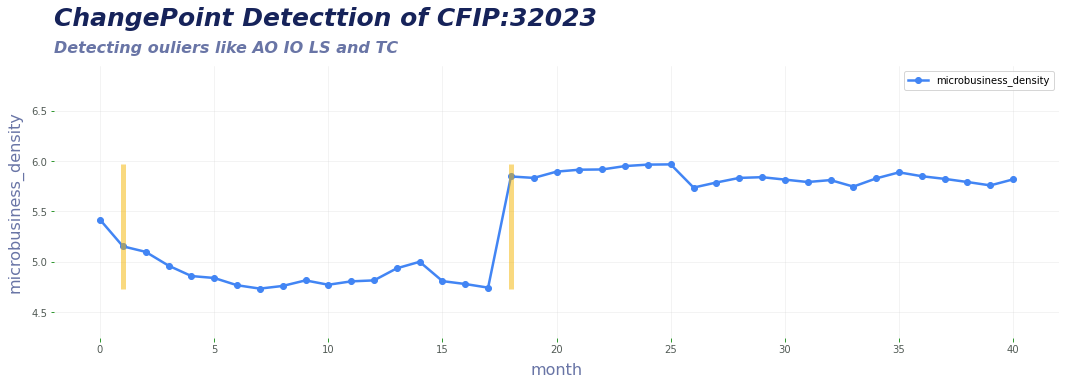



change points dectected by custom methods:[1, 18]

 setments splited by detected points:[array([5.30023074]), array([5.08693174, 5.06378301, 5.07205052, 5.05303536, 5.04972819,
       4.92075695, 4.85131069, 4.95299959, 4.96292076, 5.00591124,
       5.09189201, 5.10429337, 5.19854178, 5.18531385, 5.09602583,
       5.1249618 , 5.05138181]), array([4.73887398, 4.82154803, 4.8521378 , 4.87115259, 4.89347453,
       4.9455593 , 4.96870777, 4.95299961, 4.9720149 , 5.08527823,
       5.0943726 , 5.09519888, 5.10181309, 5.16629864, 5.20350226,
       5.16795212, 5.18531359, 5.33412724, 5.26633413, 5.25724005,
       5.25558647, 5.22086363, 5.25558647])]








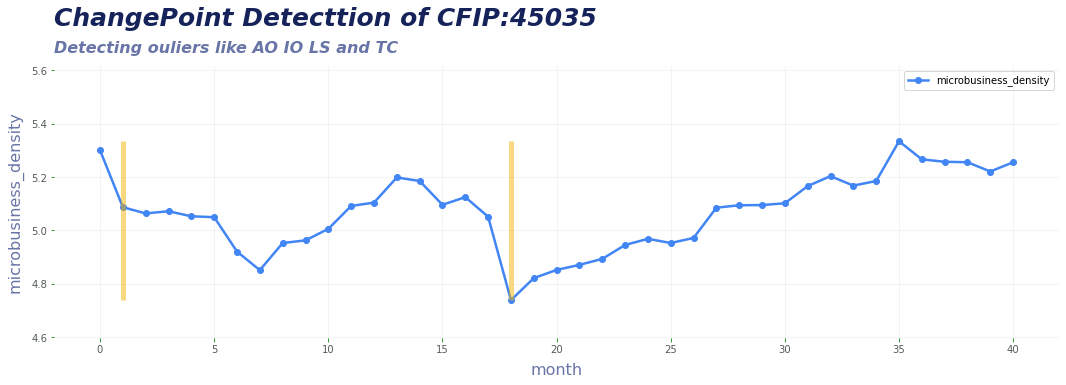



change points dectected by custom methods:[]

 setments splited by detected points:[array([1.40737918, 1.38202105, 1.40737918, 1.38836053, 1.40737918,
       1.42639783, 1.42005841, 1.41371879, 1.41371879, 1.40737917,
       1.42639783, 1.42005841, 1.45175612, 1.42005841, 1.38202108,
       1.37568145, 1.36934193, 1.38202105, 1.47711416, 1.51515156,
       1.59756557, 1.58488657, 1.57220737, 1.57854697, 1.55318877,
       1.54050976, 1.52783056, 1.55318877, 1.56586787, 1.56586788,
       1.50881199, 1.52149112, 1.55318884, 1.50881199, 1.49613285,
       1.53417015, 1.53417015, 1.52149112, 1.52783068, 1.50881199,
       1.53417015])]








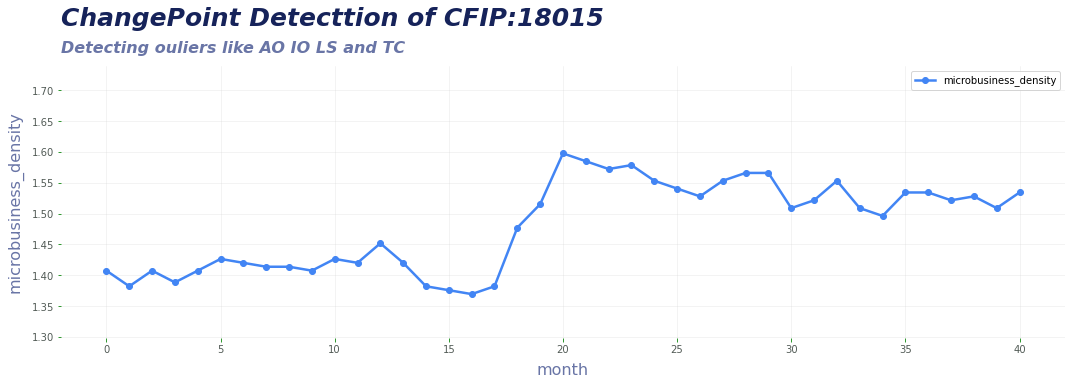



change points dectected by custom methods:[1, 18]

 setments splited by detected points:[array([2.66718591]), array([2.8365619 , 2.84045571, 2.84824302, 2.84045571, 2.87744575,
       2.85992411, 2.86965832, 2.89496739, 2.92611701, 2.9163828 ,
       2.86381787, 2.88523308, 2.91054235, 2.87549876, 2.86381787,
       2.87939263, 2.87355208]), array([3.13053648, 3.16363293, 3.17920765, 3.18699512, 3.17920765,
       3.21035731, 3.24734744, 3.23566629, 3.22787893, 3.23955997,
       3.28823124, 3.27849702, 3.31743406, 3.33690243, 3.33300894,
       3.31354026, 3.33495569, 3.3972549 , 3.40309544, 3.48875692,
       3.49849125, 3.50627854, 3.51601288])]








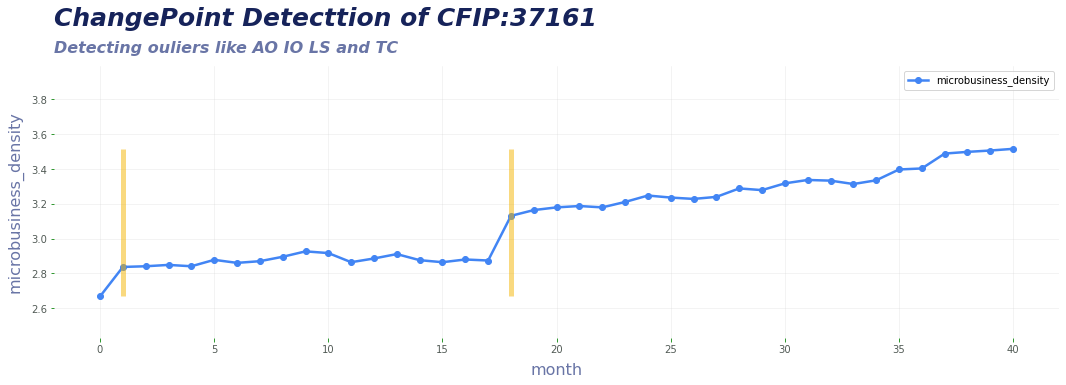

In [11]:
cfip = 5071
for cfip in np.random.choice(train.cfips.unique(), size=5, replace=False):
    df = train[train.cfips==cfip].microbusiness_density.values
    segms,split_points = CusOulierDet(df)
    print(
    f'\n\nchange points dectected by custom methods:{split_points}\n\n',
    f'setments splited by detected points:{segms}\n\n\n'
    )


    pltObj = MyPlots(x=range(len(df)), y=df,barOrLine='line',
                     title='Detecting ouliers like AO IO LS and TC ',
                     SeriselableName='microbusiness_density',
                     x_label='month', y_label='microbusiness_density',
                     main_title=f'ChangePoint Detecttion of CFIP:{cfip}')
    min_ =  df.min()
    max_ =  df.max()
    pltObj.vlines(split_points , ymin=min_ ,ymax= max_, linewidth=5,color='#F4B400', alpha=0.5)
    pltObj.show()


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.3em;">
     &nbsp;
<p style="font-size:18px; font-family:Georgia; line-height: 1.5em;color:#6975A6;">
📌So far so good,except for cfip 40137,it shows significant different trends at time 14,how about some chow_test?let do it
    <br>
</div>



<h1 style="font-family: 'Georgia', serif;font-weight: bold;margin: 2rem 0 1rem 0;line-height: 1.2;color: #16235A;">Chow Test  <a class='anchor' id='chotest'></a><a href="#top"> ↑</a></h1>

In [12]:
# for breakpoint in xts[2:]:
#     print(breakpoint)


1.1102230246251565e-16





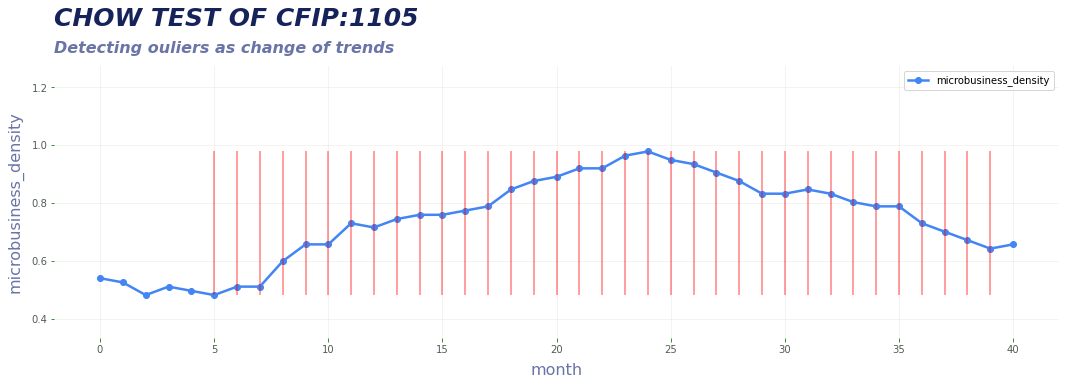

In [13]:
cfip=1105
df = train.loc[train.cfips==cfip,'microbusiness_density'].values
xts = np.arange(len(df))
breakpoints = []
p_values = []
# chow_test(x, y, breakpoint)
for breakpoint in xts[2:]:
    p_value = chow_test(df, xts, breakpoint)
    testPassed = (p_value<0.05)
    p_values.append(p_value)
    if breakpoint==19:
        print(p_value)
#     print(f'备选 breakpoint:{breakpoint} ,test p :{p_value} ISsignificans:{ testPassed }')
    if p_value<0.05:
        breakpoints.append(breakpoint)

        
pltObj = MyPlots(x=xts, y=df,barOrLine='line',
                     title='Detecting ouliers as change of trends ',
                     SeriselableName='microbusiness_density',
                     x_label='month', y_label='microbusiness_density',
                     main_title=f'CHOW TEST OF CFIP:{cfip}')
min_ =  df.min()
max_ =  df.max()
pltObj.vlines(breakpoints , ymin=min_ ,ymax= max_, color='red', alpha=0.5)
pltObj.show()

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.3em;">
<h3 style="font-family: 'Georgia', serif;font-weight: bold;margin: 2rem 0 1rem 0;line-height: 1.2;color: #16235A;">oops !!! that's... </h3>
<p style="font-size:18px; font-family:Georgia; line-height: 1.5em;color:#6975A6;">
📌As we can see,there three parts of segmenst shows diffenet trends.chow_test testing by split data into two parts which make this situation confused.OK,that's do it by windows 
    <br><br>
</div>






 Candidate: []





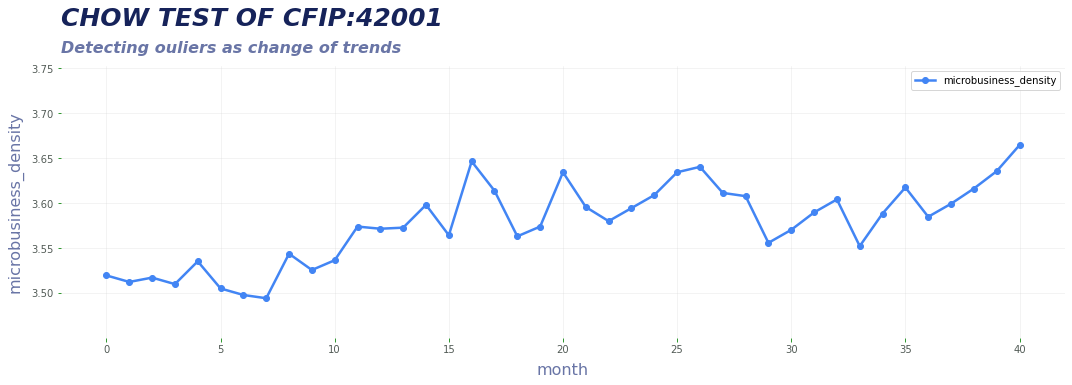



 Candidate: []





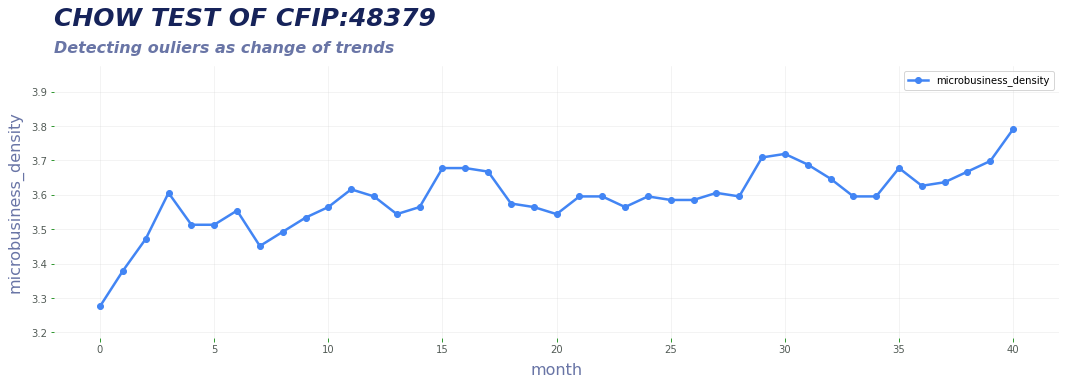



 Candidate: [13, 20]





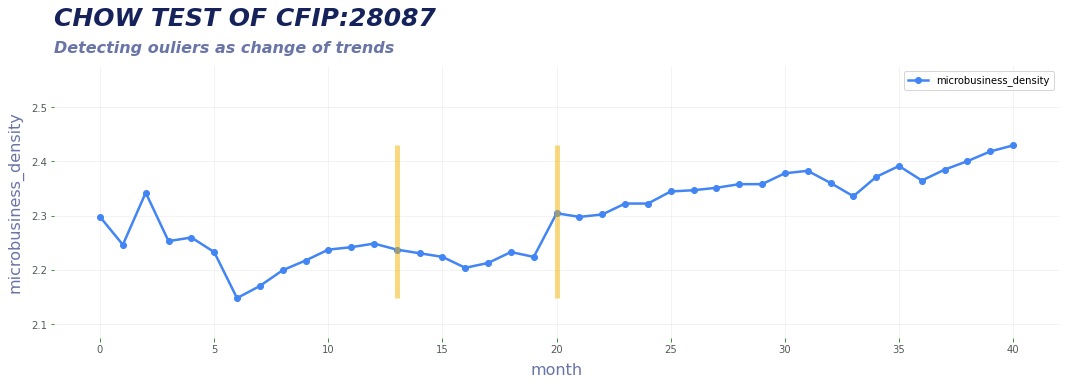



 Candidate: [18, 26]





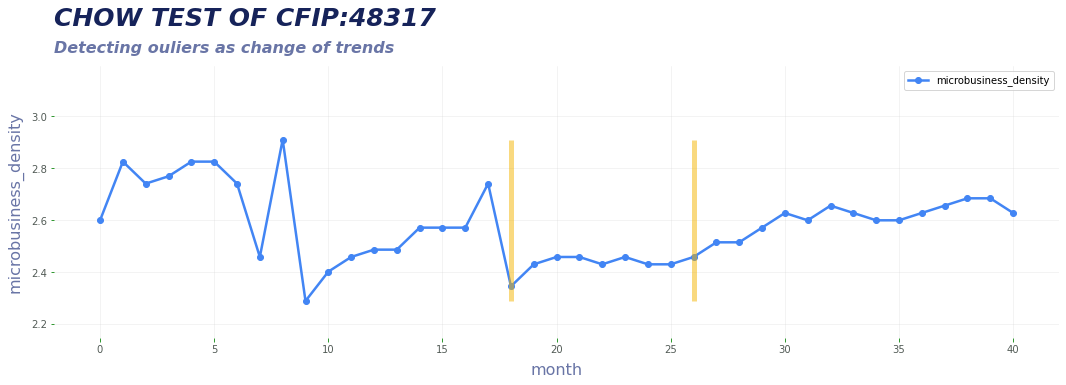



 Candidate: [8, 18]





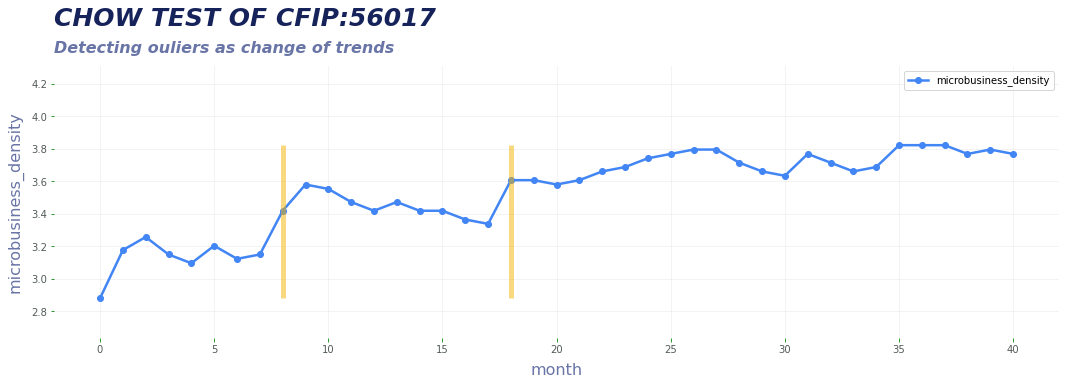



 Candidate: [8]





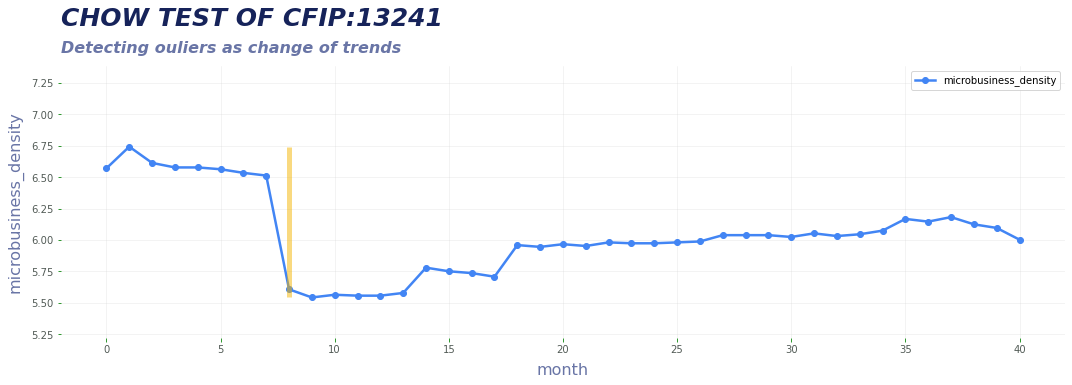



 Candidate: [13, 26]





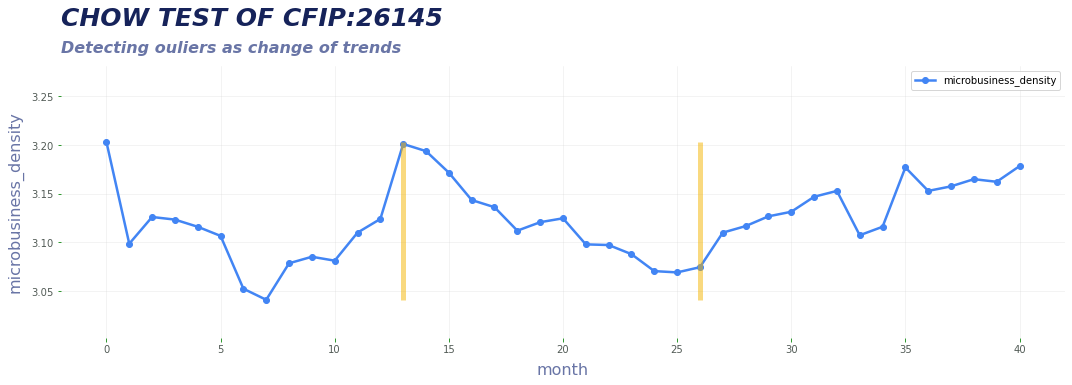



 Candidate: [13, 26]





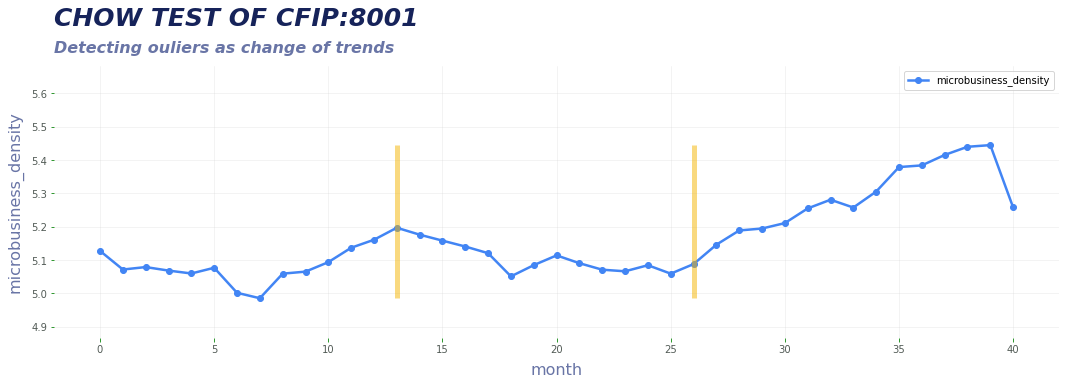



 Candidate: [8, 25]





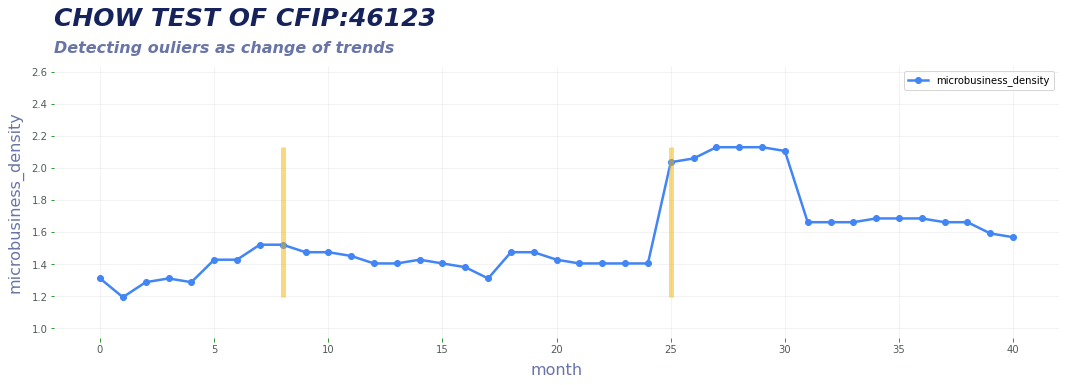



 Candidate: [18]





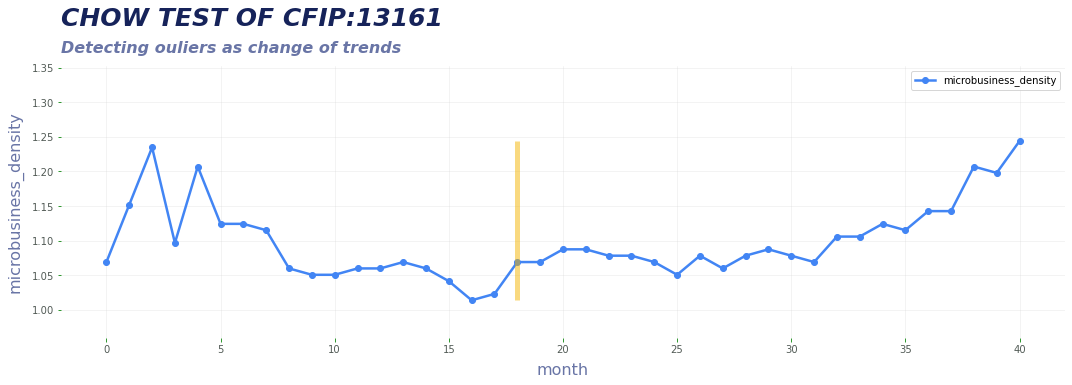



 Candidate: []





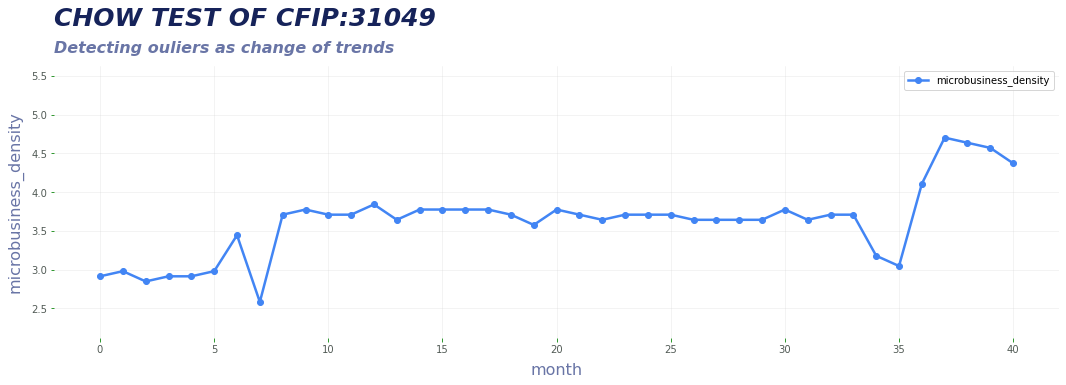



 Candidate: [21]





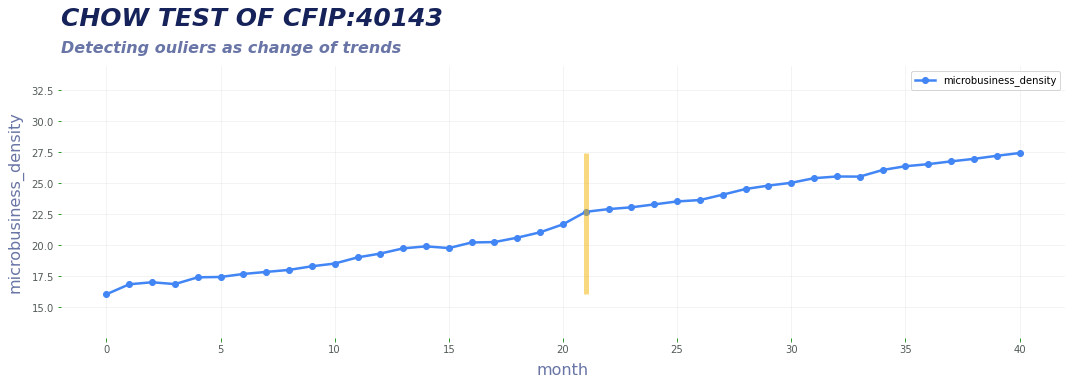



 Candidate: [18]





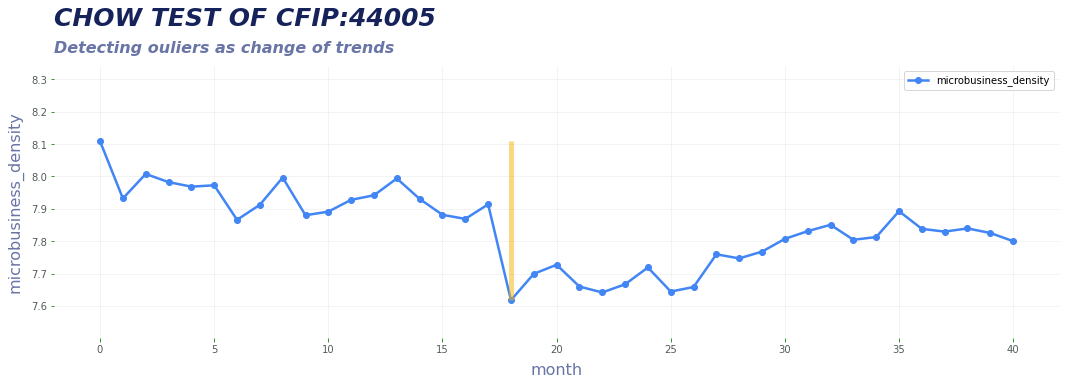



 Candidate: [12]





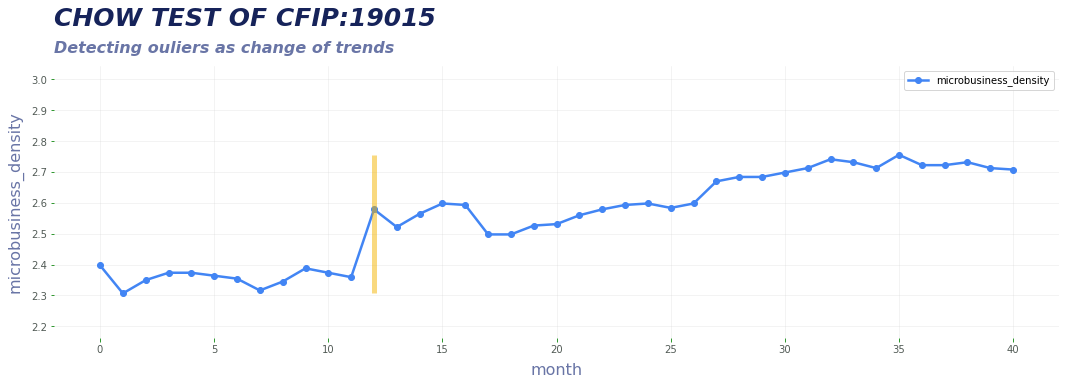



 Candidate: [18]





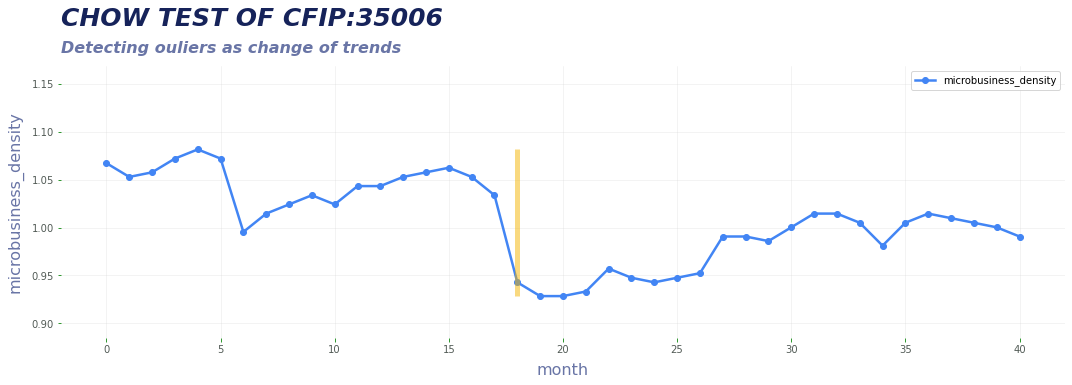



 Candidate: []





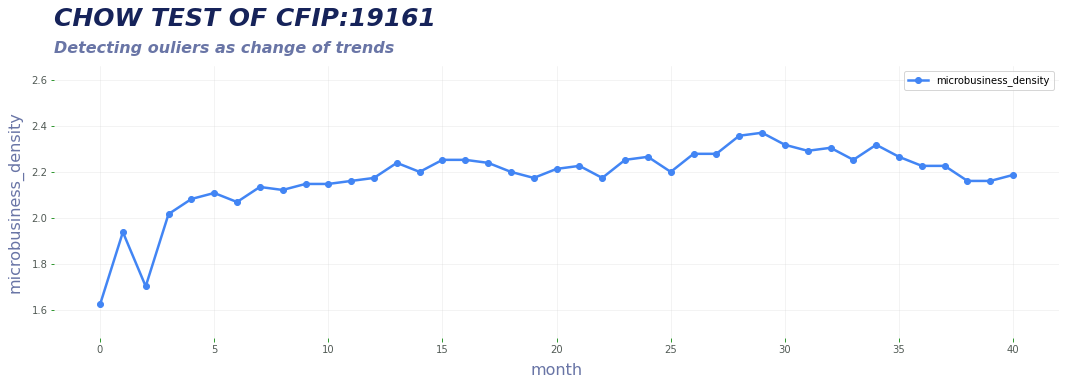



 Candidate: [18]





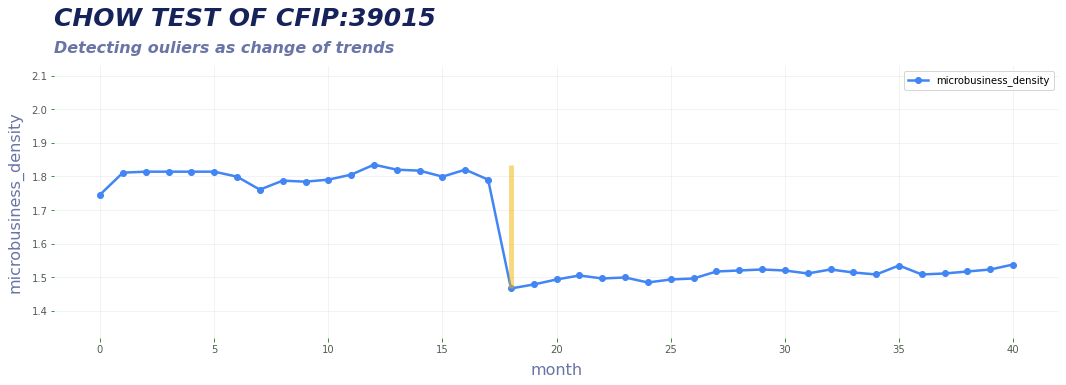



 Candidate: [10, 17, 27]





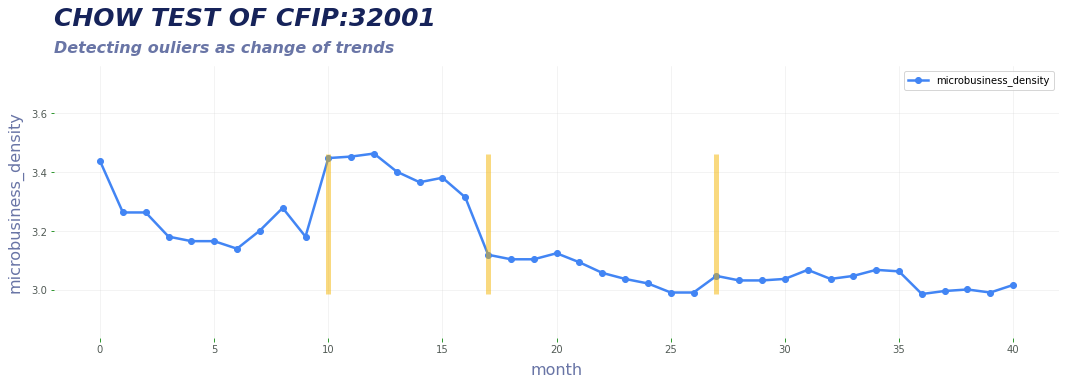



 Candidate: [15, 27]





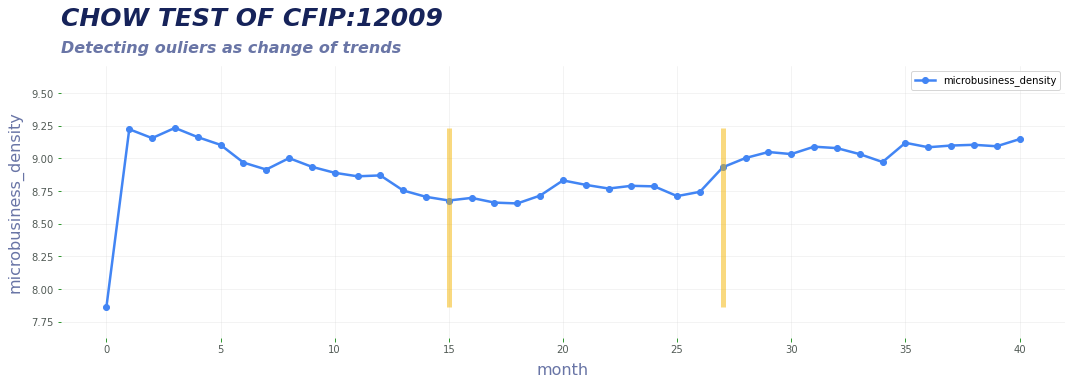



 Candidate: [11, 18]





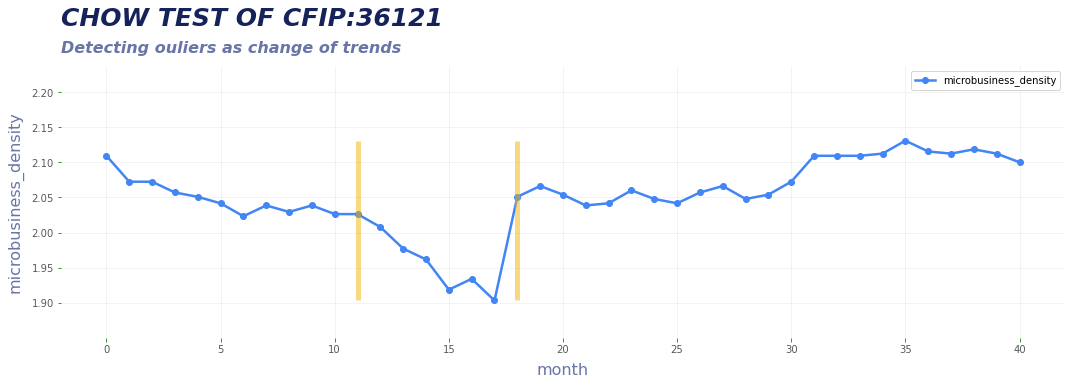



 Candidate: [13, 26]





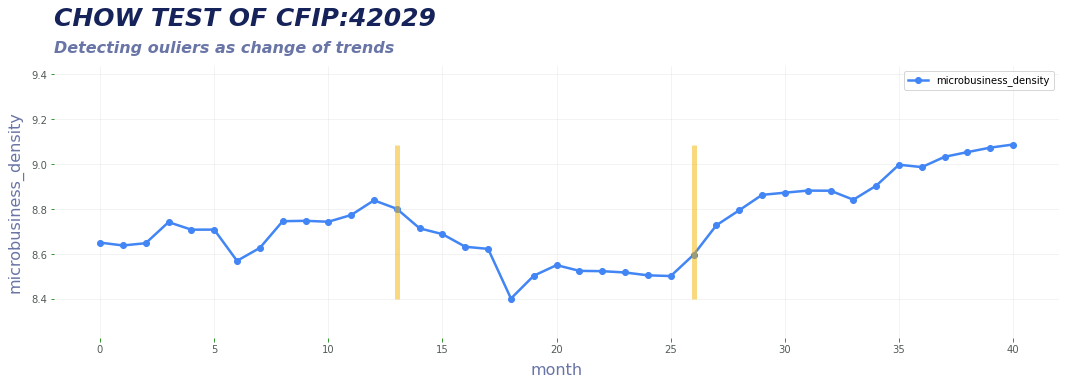



 Candidate: [18]





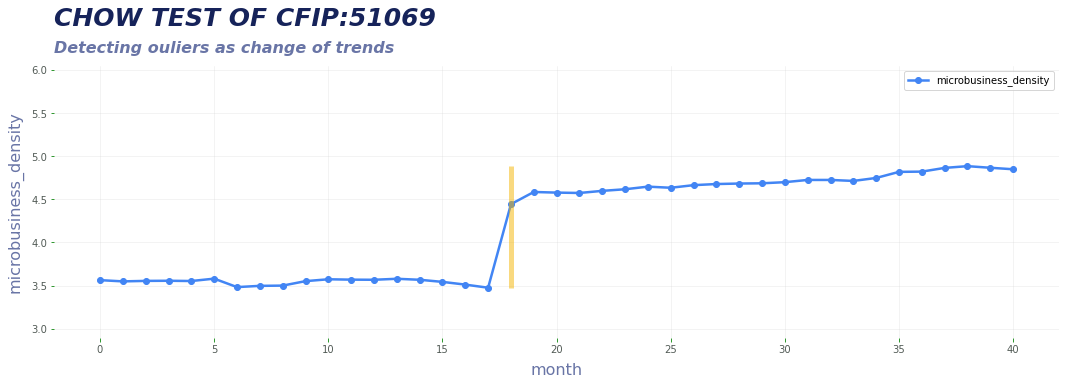



 Candidate: [19, 29]





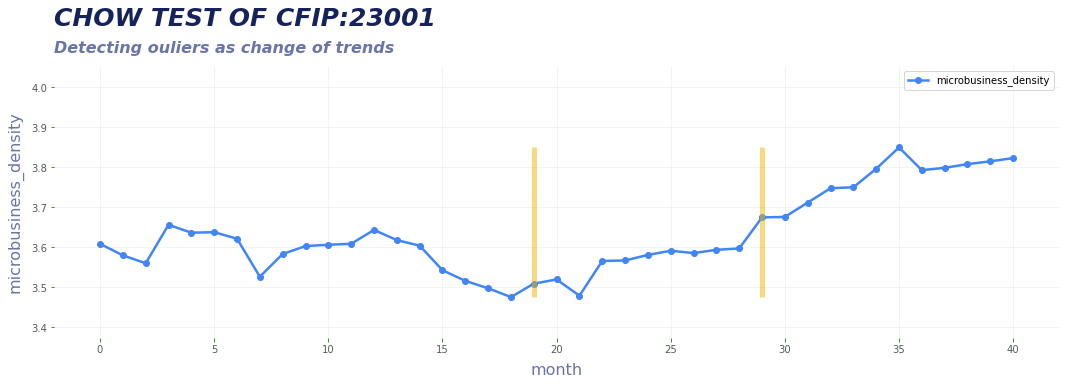



 Candidate: [21]





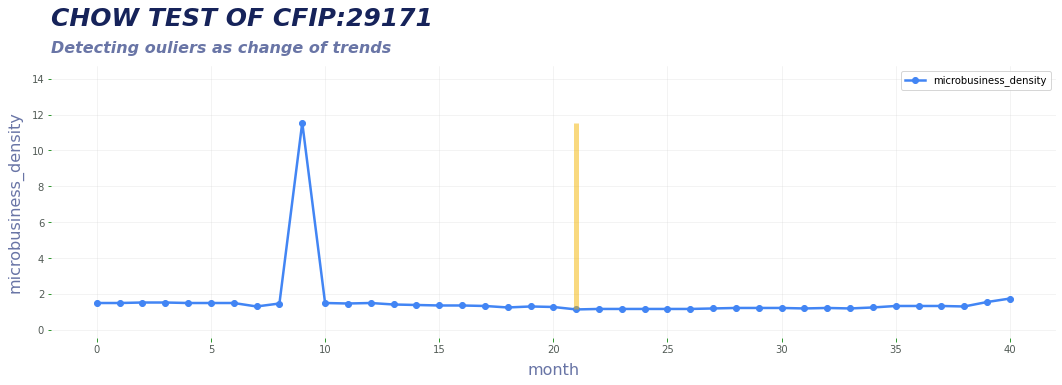



 Candidate: [18]





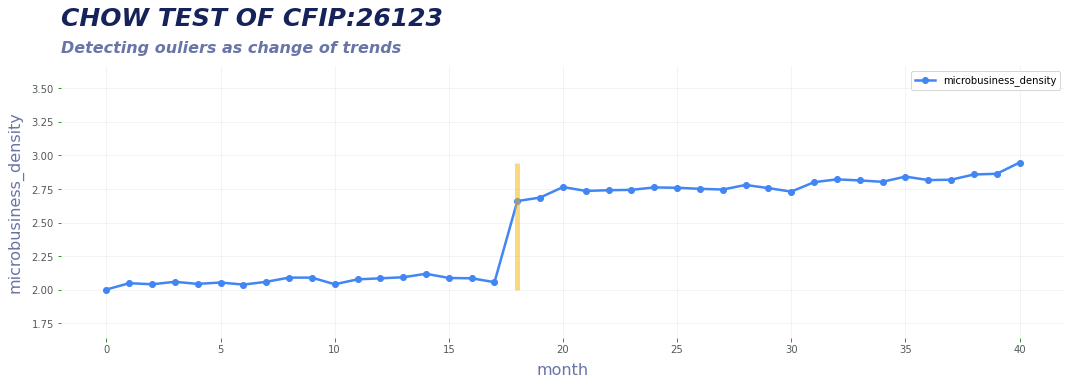



 Candidate: [18]





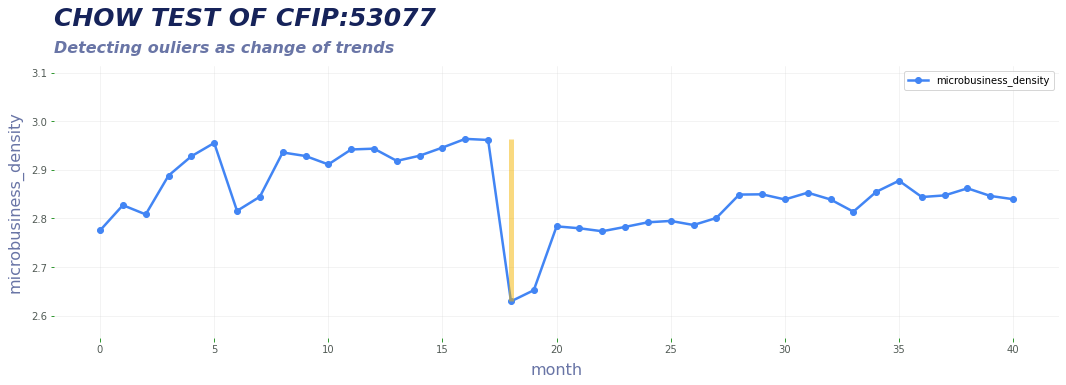



 Candidate: [18]





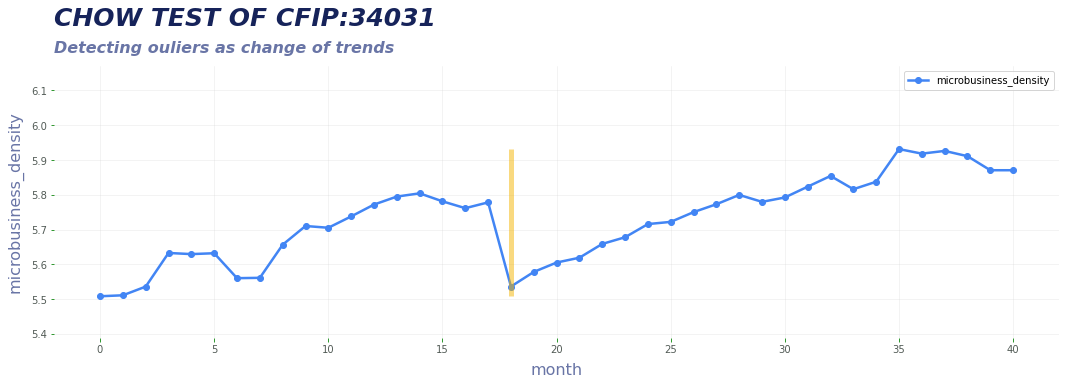



 Candidate: [7, 27]





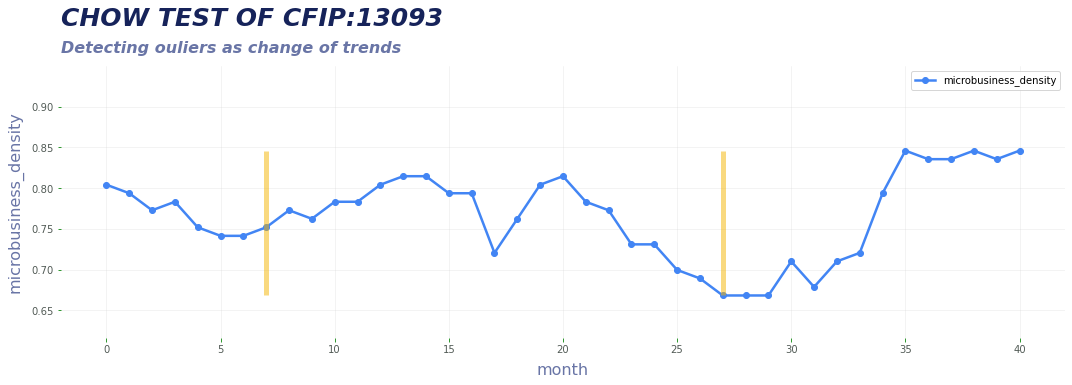



 Candidate: [18, 33]





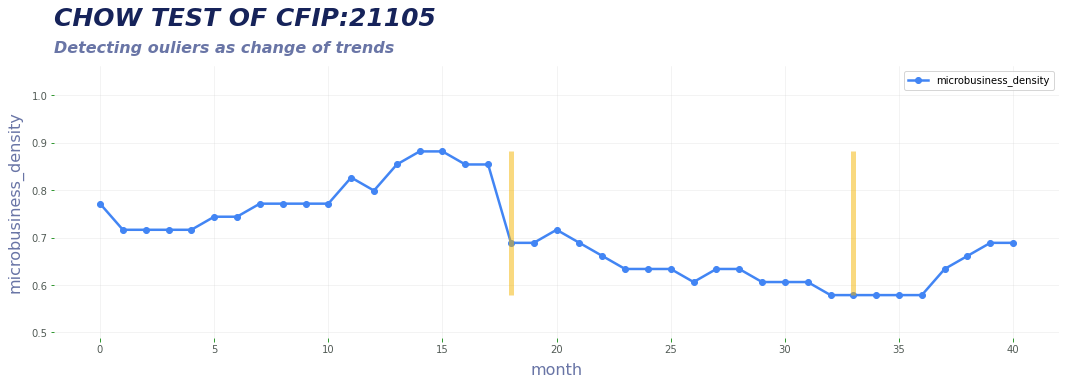



 Candidate: [17, 25]





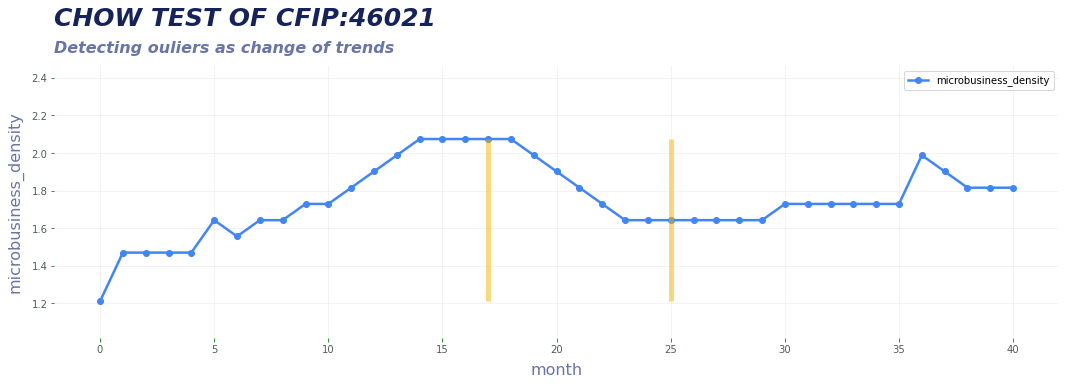



 Candidate: [10, 18]





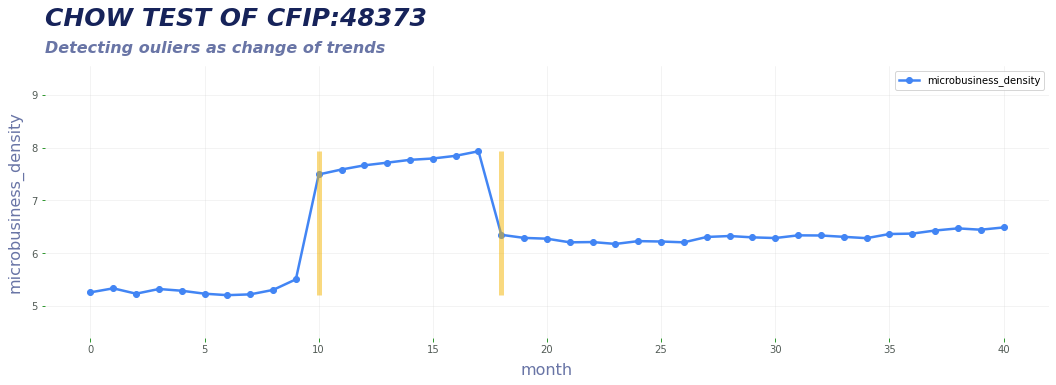



 Candidate: [13, 27]





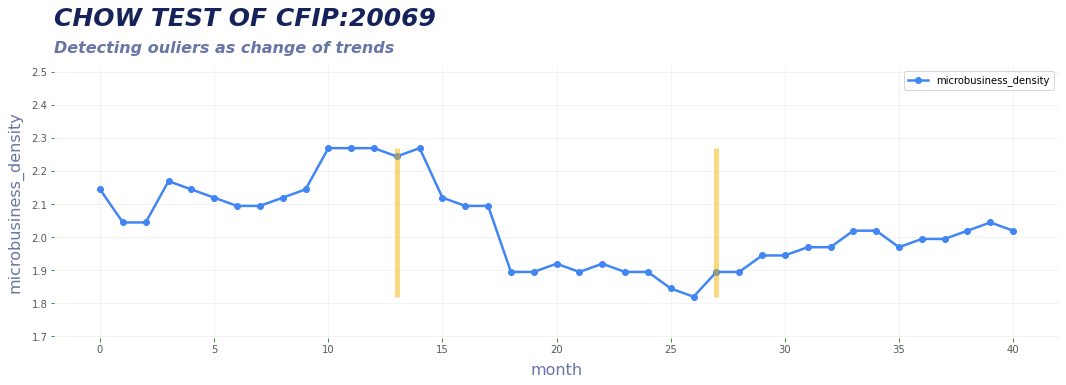



 Candidate: [9, 18]





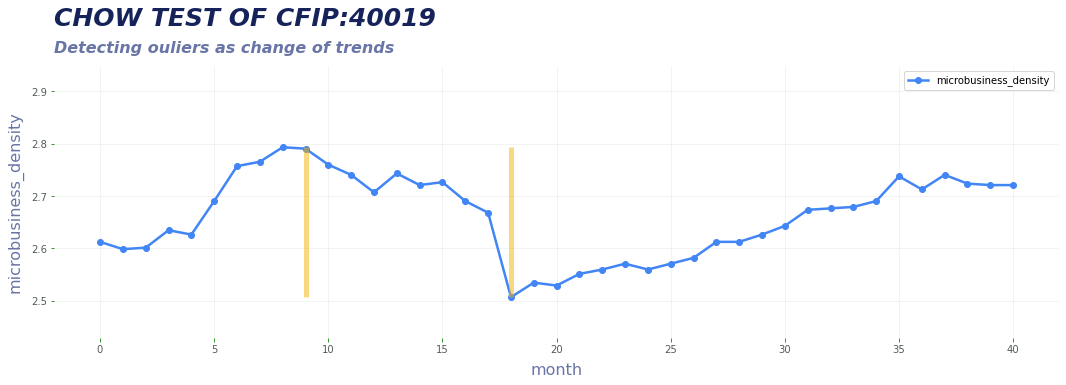



 Candidate: [18]





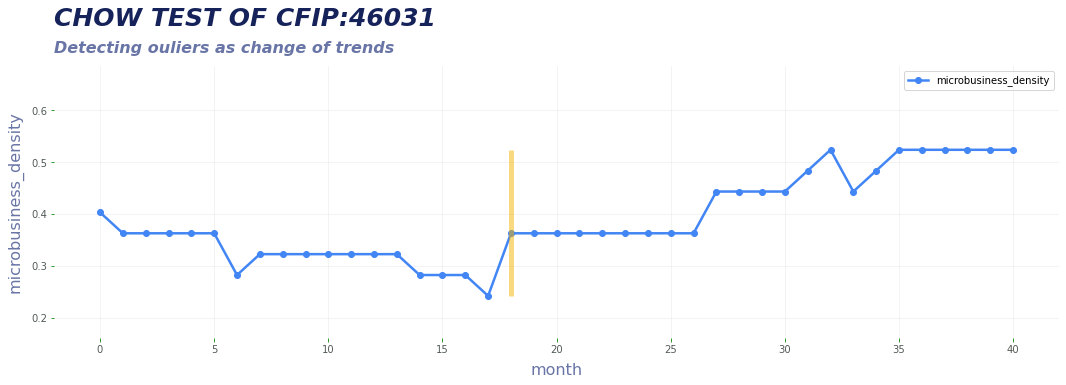



 Candidate: [7, 15]





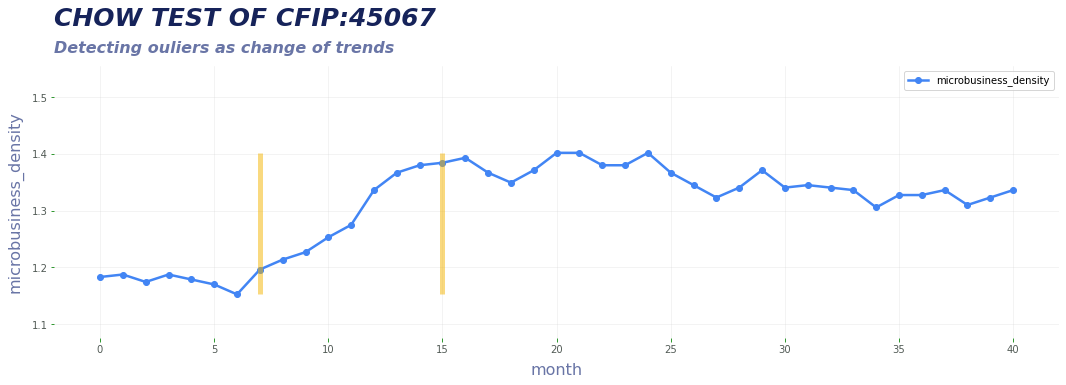



 Candidate: [19, 27]





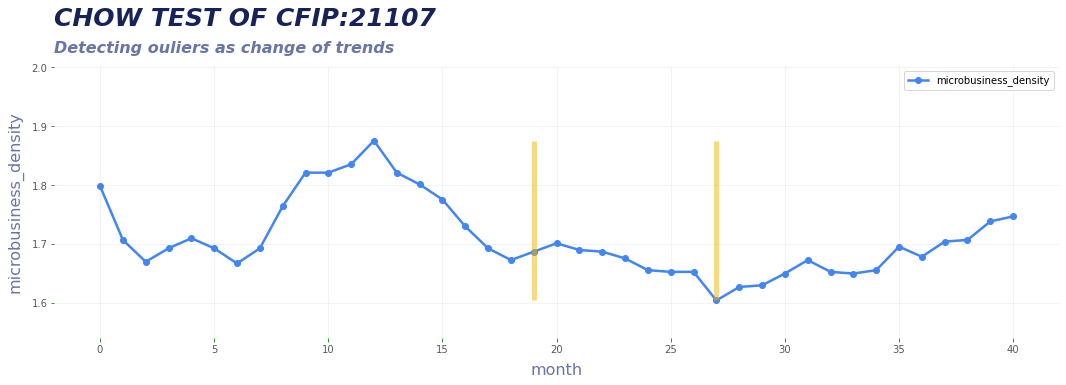



 Candidate: [11, 18, 33]





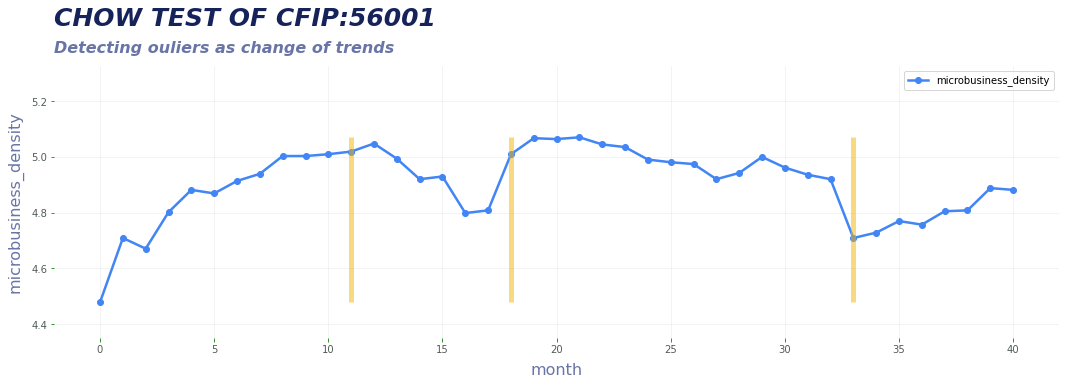



 Candidate: [31]





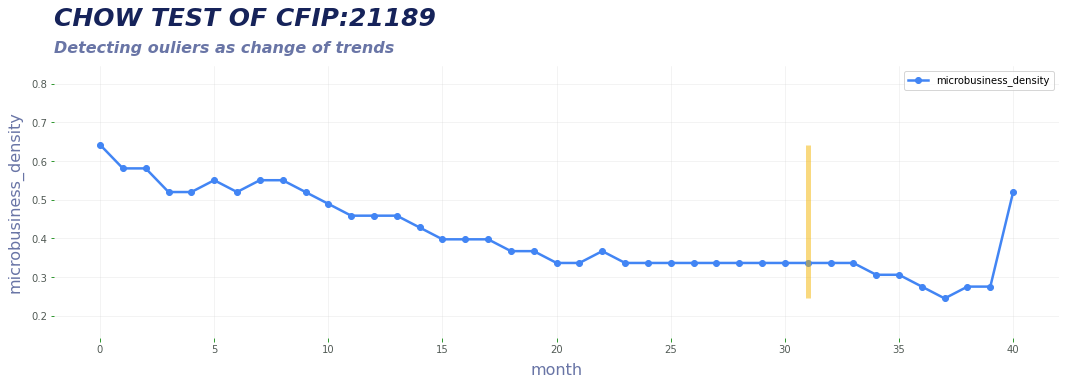



 Candidate: [7, 23, 32]





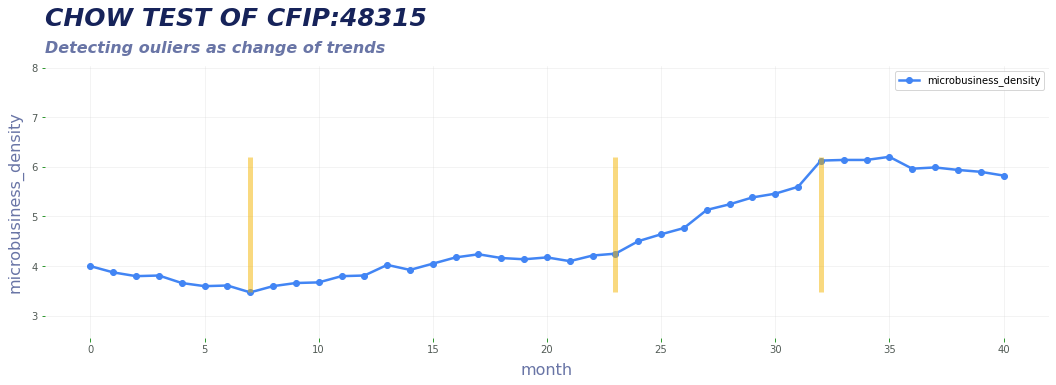



 Candidate: [11, 18, 31]





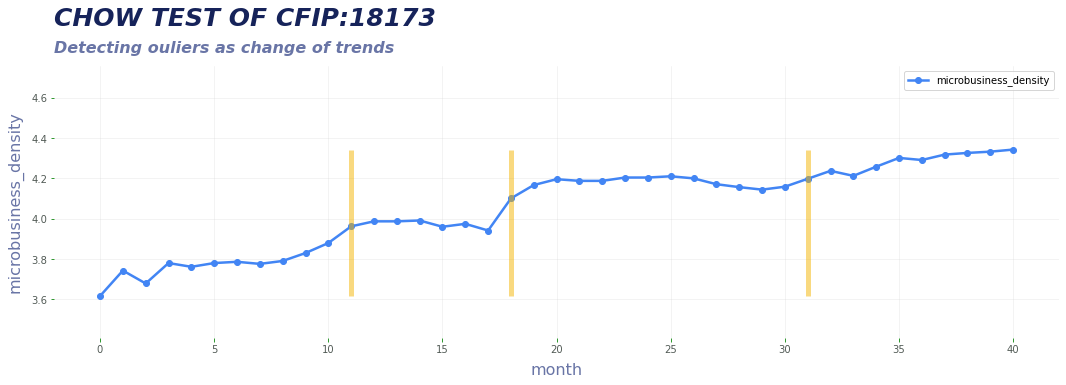



 Candidate: []





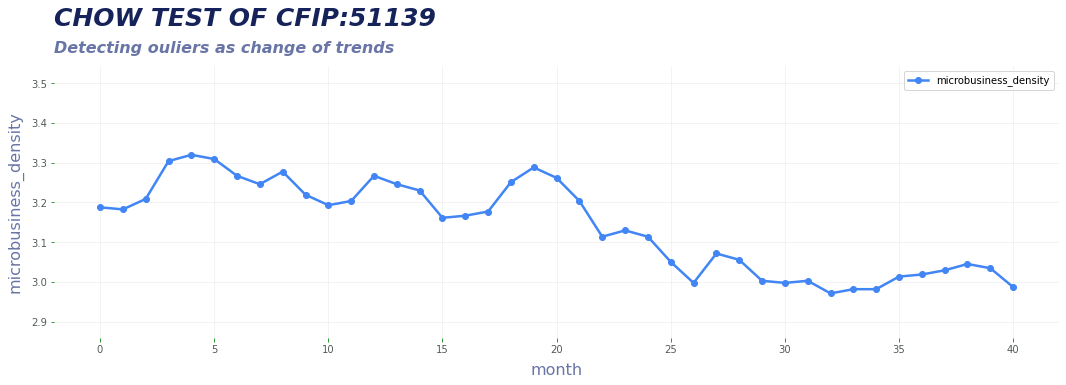



 Candidate: [13, 20]





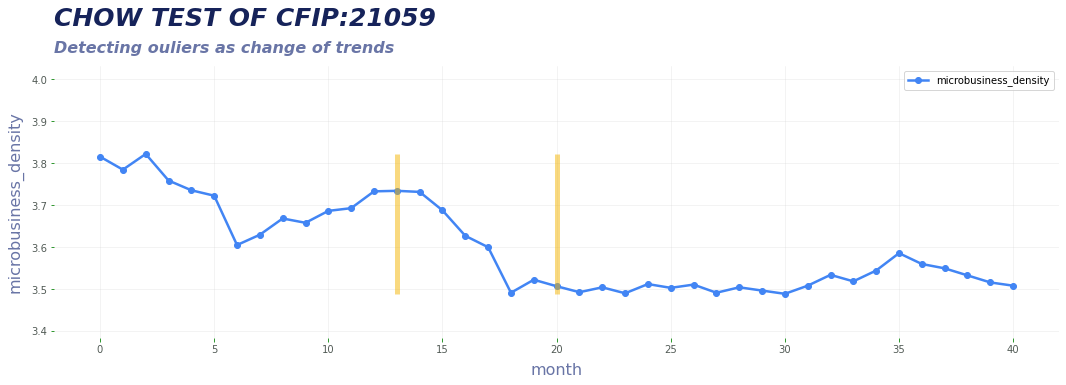



 Candidate: [13]





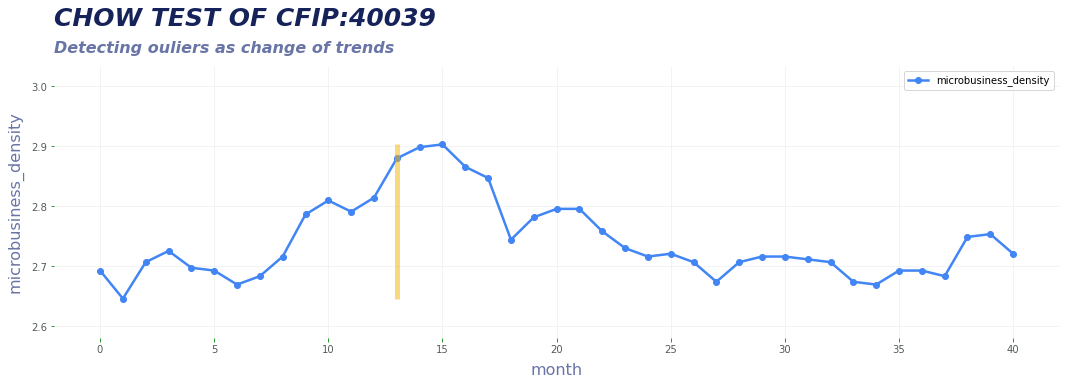



 Candidate: []





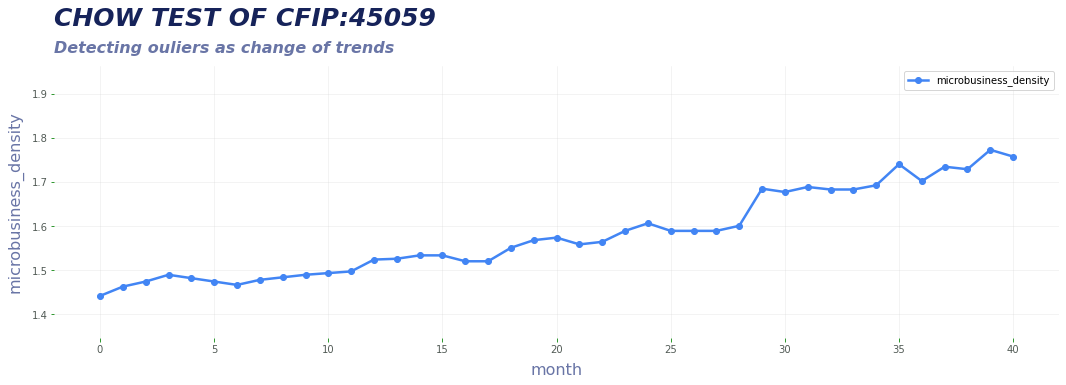



 Candidate: [18]





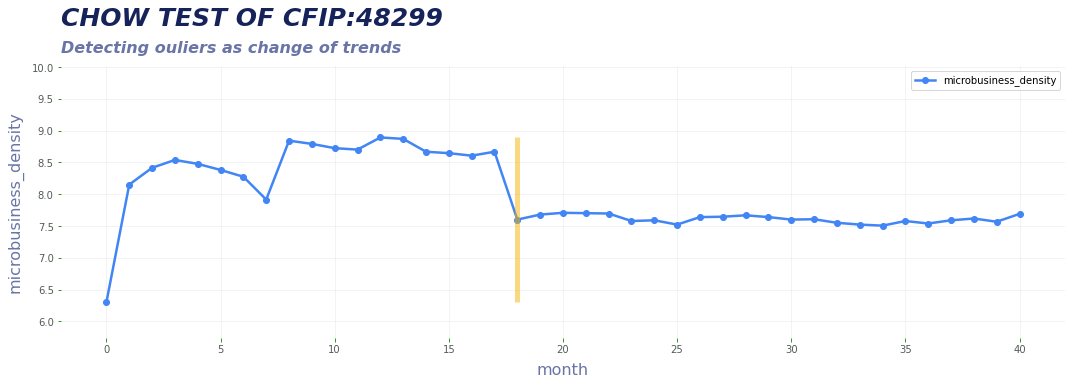



 Candidate: [9]





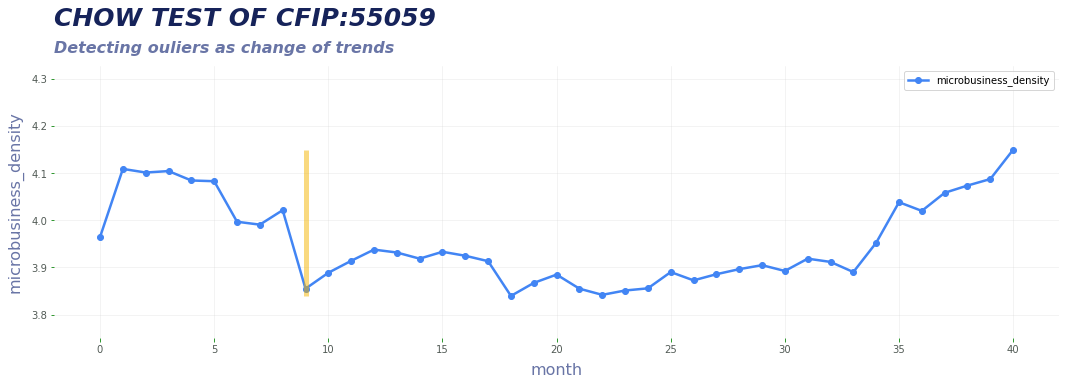



 Candidate: [24]





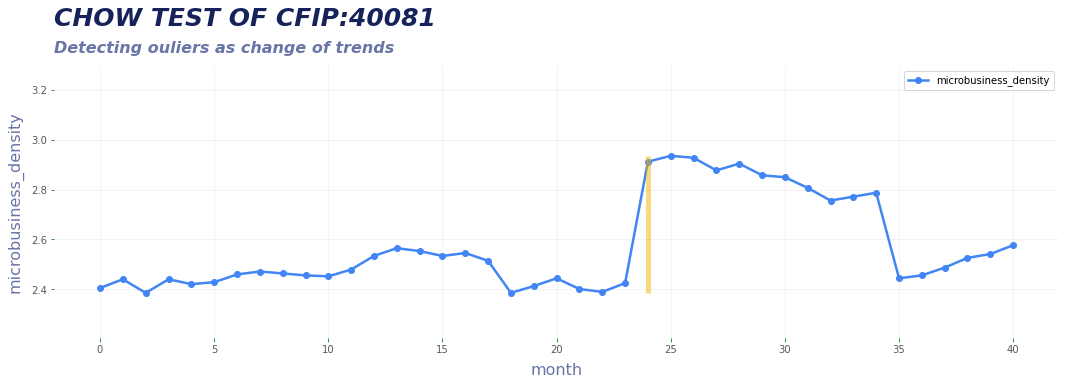



 Candidate: [12, 26]





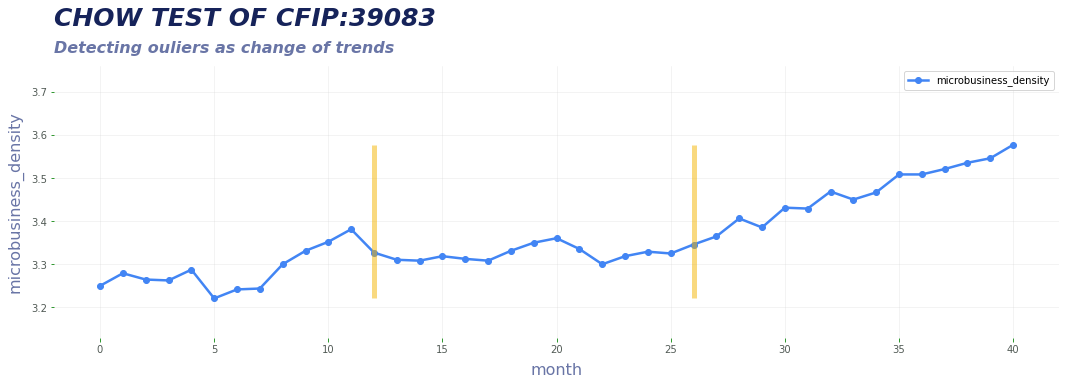



 Candidate: [19]





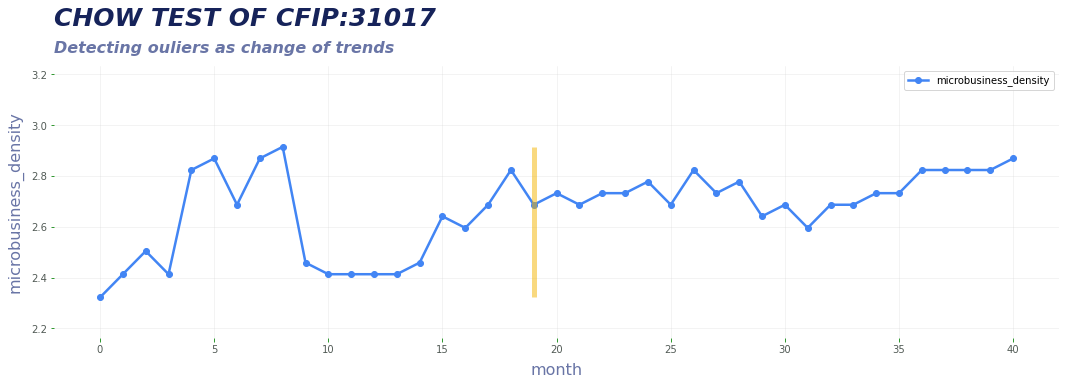



 Candidate: [25, 32]





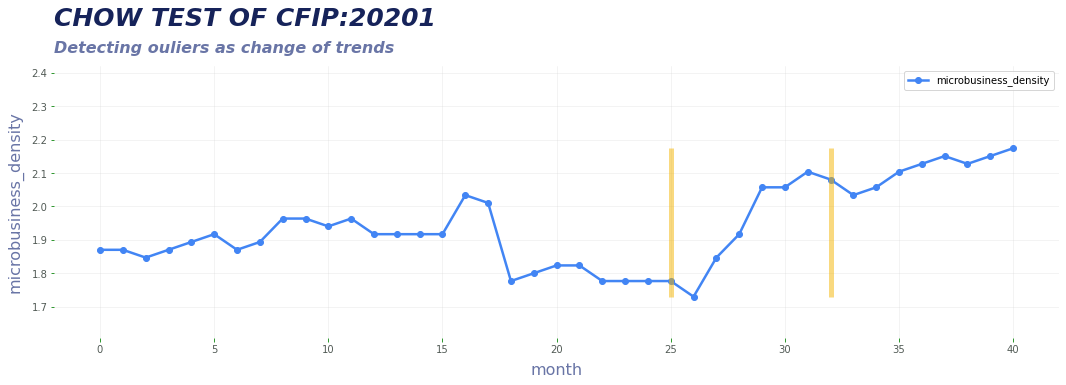

In [14]:

side_winds = 7
sample_size = 50
for cfip in np.random.choice(train.cfips.unique(), size=sample_size, replace=False):
#     cfip = 28101
    Candidate_dict = {} 
    threadhold = 0.05
    last_candi = 0
    
    df = train.loc[train.cfips==cfip,'microbusiness_density'].values
    xts = np.arange(len(df))

    for breakpoint in xts[side_winds:-side_winds]:
#         print(f'breakpoint:{breakpoint}')
        p_value = chow_test(df[breakpoint-side_winds:breakpoint+side_winds],
                            xts[breakpoint-side_winds:breakpoint+side_winds], 
                            side_winds)
#         print(f'p_value:{p_value}')
    #     print(p_value )
        if p_value<threadhold:
            set_candi_condi = (last_candi in Candidate_dict) & (0<breakpoint- last_candi< side_winds)
#             print(f'last_candi:{last_candi}')
    #         print( set_candi_condi,(last_candi in Candidate_dict),(0<breakpoint- last_candi< side_winds) )
            if set_candi_condi:
                if Candidate_dict[last_candi]>p_value:
                    Candidate_dict[breakpoint] = p_value
                    del Candidate_dict[last_candi]
                    last_candi = breakpoint
            else:
                last_candi = breakpoint
                Candidate_dict[breakpoint] = p_value
    Candidate = sorted(Candidate_dict.items(), key=lambda x: x[1])[:3]
    Candidate = sorted([x[0] for x in Candidate if x[1]<0.001])
    print('\n\n Candidate:',Candidate)
    pltObj = MyPlots(x=xts, y=df,barOrLine='line',
                         title='Detecting ouliers as change of trends ',
                         SeriselableName='microbusiness_density',
                         x_label='month', y_label='microbusiness_density',
                         main_title=f'CHOW TEST OF CFIP:{cfip}')
    min_ =  df.min()
    max_ =  df.max()
    pltObj.vlines(Candidate , ymin=min_ ,ymax= max_, linewidth=5,color='#F4B400', alpha=0.5)
    pltObj.show()




<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.3em;">
<p style="font-size:18px; font-family:Georgia; line-height: 1.5em;color:#6975A6;">
📌Hmm, it seems much better now, but there are still some issues. Let's put them aside for the time being and optimize them later.
    <br><br>
</div>

<h1 style="font-family: 'Georgia', serif;font-weight: bold;margin: 2rem 0 1rem 0;line-height: 1.2;color: #16235A;">ARIMA Test  <a class='anchor' id='arima'></a><a href="#top"> ↑</a></h1>





 Candidate: [32]





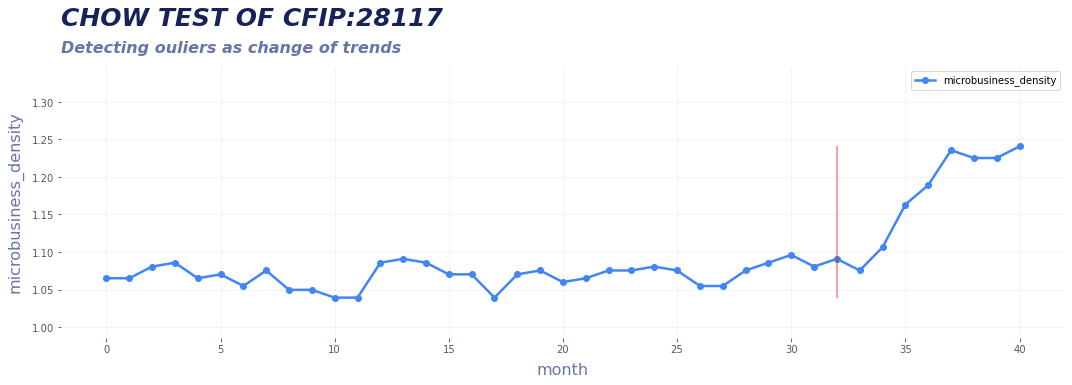



 Candidate: [10, 18]





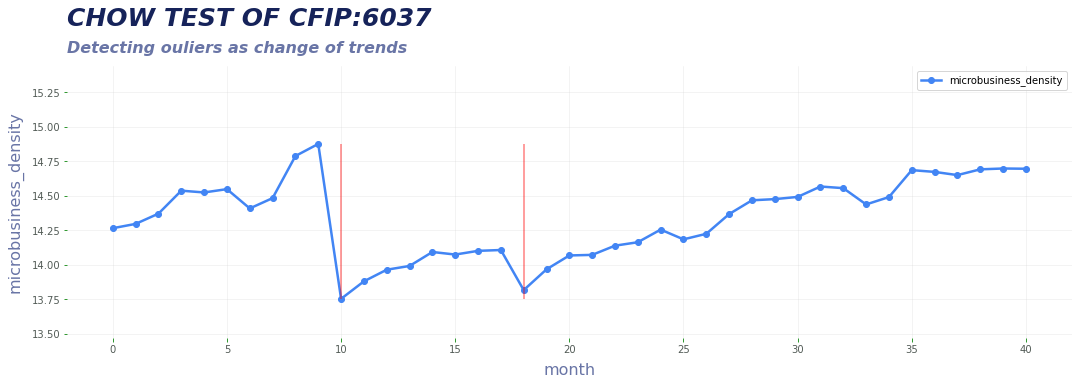



 Candidate: [18]





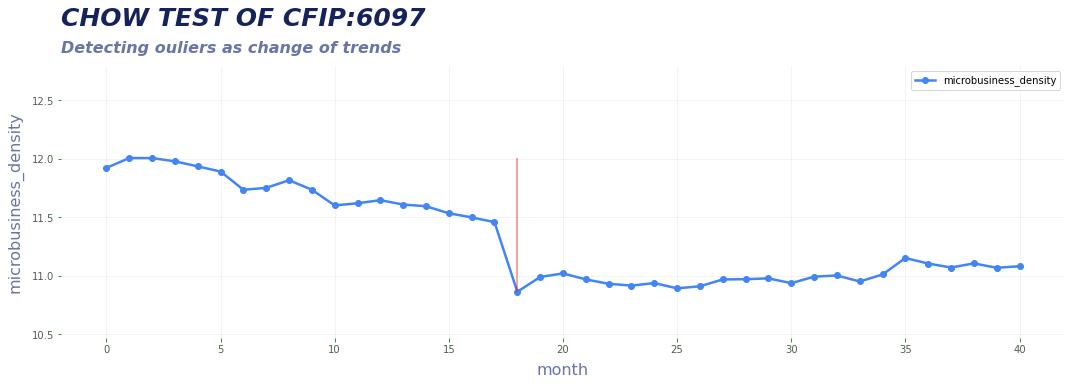



 Candidate: [18, 33]





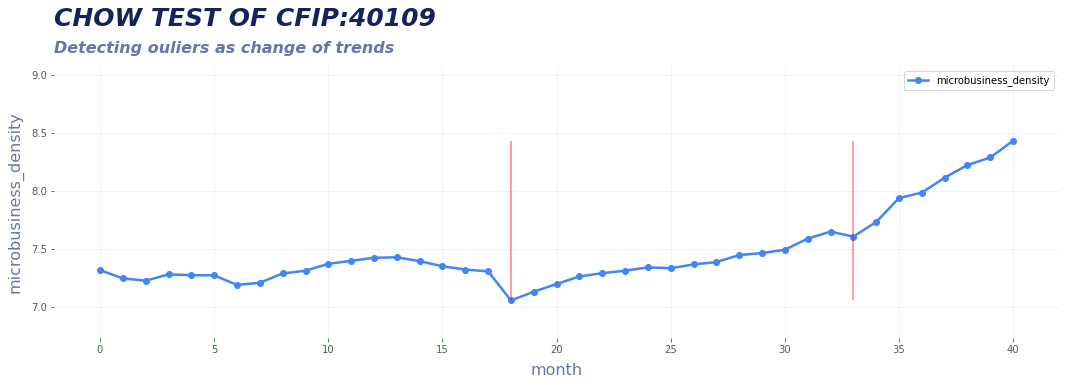

In [15]:


side_winds = 7
sample_size = 1
for cfip in [28117,6037,6097,40109]:
    Candidate_dict = {} 
    threadhold = 0.05
    last_candi = 0
    
    df = train.loc[train.cfips==cfip,'microbusiness_density'].values
    xts = np.arange(len(df))

    for breakpoint in xts[side_winds:-side_winds]:
#         print(f'breakpoint:{breakpoint}')
        p_value = chow_test(df[breakpoint-side_winds:breakpoint+side_winds],
                            xts[breakpoint-side_winds:breakpoint+side_winds], 
                            side_winds)
#         print(f'p_value:{p_value}')
    #     print(p_value )
        if p_value<threadhold:
            set_candi_condi = (last_candi in Candidate_dict) & (0<breakpoint- last_candi< side_winds)
#             print(f'last_candi:{last_candi}')
    #         print( set_candi_condi,(last_candi in Candidate_dict),(0<breakpoint- last_candi< side_winds) )
            if set_candi_condi:
                if Candidate_dict[last_candi]>p_value:
                    Candidate_dict[breakpoint] = p_value
                    del Candidate_dict[last_candi]
                    last_candi = breakpoint
            else:
                last_candi = breakpoint
                Candidate_dict[breakpoint] = p_value
    Candidate = sorted(Candidate_dict.items(), key=lambda x: x[1])[:3]
    Candidate = sorted([x[0] for x in Candidate if x[1]<0.001])
    print('\n\n Candidate:',Candidate)
    pltObj = MyPlots(x=xts, y=df,barOrLine='line',
                         title='Detecting ouliers as change of trends ',
                         SeriselableName='microbusiness_density',
                         x_label='month', y_label='microbusiness_density',
                         main_title=f'CHOW TEST OF CFIP:{cfip}')
    min_ =  df.min()
    max_ =  df.max()
    pltObj.vlines(Candidate , ymin=min_ ,ymax= max_, color='red', alpha=0.5)
    pltObj.show()




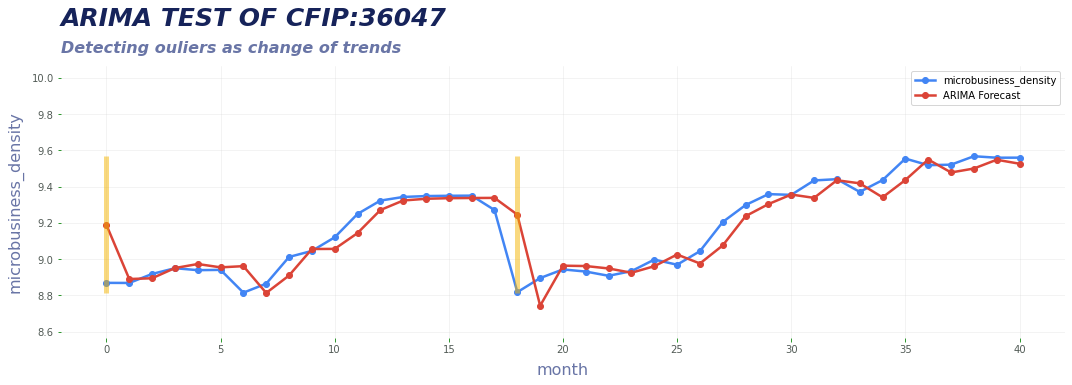

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


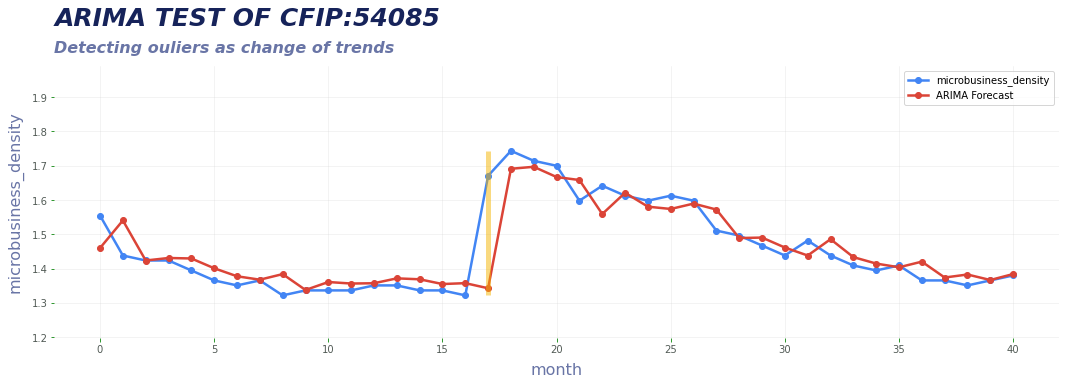

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


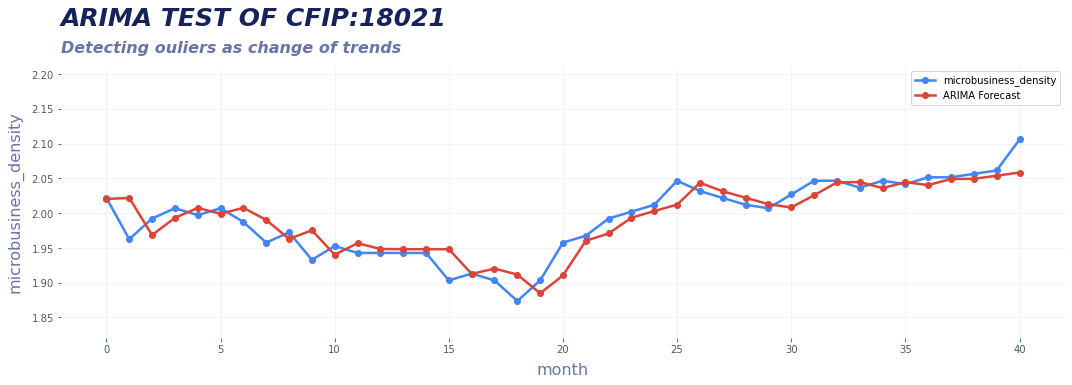

In [16]:
from statsmodels.tsa.arima.model import ARIMA
#     for ma_q  in range(5):
#         for ar_p in range(5):
#             cfip = 26085


sample_size = 5
for cfip in [36047,54085,18021]:

    df = train.loc[train.cfips==cfip,'microbusiness_density'].values

    # Fit ARIMA model
    model = ARIMA(df, order=(1, 0, 1))
    model_fit = model.fit()

    # Calculate residuals
    residuals = pd.Series(model_fit.resid).abs()
    forecat = model_fit.forecasts[0]

    # Calculate mean and standard deviation of residuals
    mu = residuals[1:].mean()
    sigma = residuals[1:].std()

    # Detect temporary change
    threshold = mu + 3 * sigma  # Set threshold to 3 sigma
    temporary_change = residuals[residuals > threshold]

    pltObj = MyPlots(x=xts, y=df,barOrLine='line',
                         title='Detecting ouliers as change of trends ',
                         SeriselableName='microbusiness_density',
                         x_label='month', y_label='microbusiness_density',
                         main_title=f'ARIMA TEST OF CFIP:{cfip}',
                        serise1=forecat,
                        color1 ='#DB4437',
                         lableName1 = 'ARIMA Forecast' 
                    )


    min_ =  df.min()
    max_ =  df.max()
    pltObj.vlines(temporary_change.index , ymin=min_ ,ymax= max_, linewidth=5,color='#F4B400', alpha=0.5)
    pltObj.show()


In [17]:
(df[20]-df[2])/18

-0.0019225329515742714

In [18]:
(df[40]-df[25])/(40-25)

0.003954913489552414

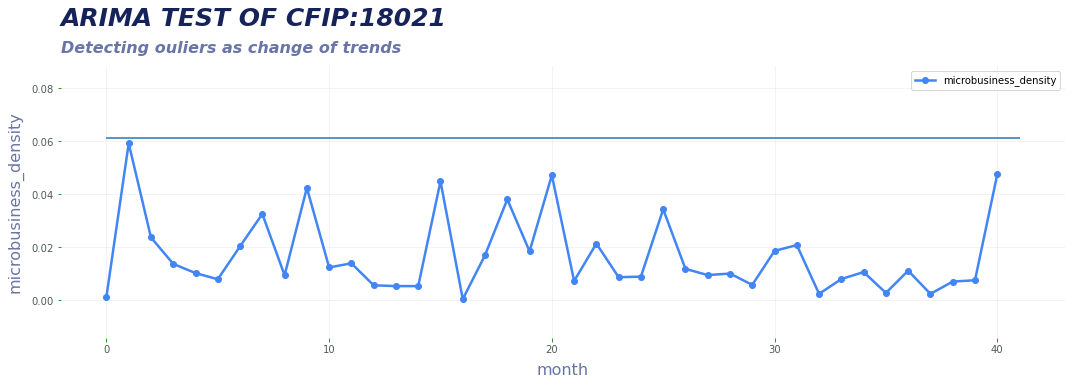

In [19]:
pltObj = MyPlots(x=xts, y=residuals,barOrLine='line',
                         title='Detecting ouliers as change of trends ',
                         SeriselableName='microbusiness_density',
                         x_label='month', y_label='microbusiness_density',
                         main_title=f'ARIMA TEST OF CFIP:{cfip}',
                    )
pltObj.hlines(threshold,xmin=0,xmax=41)

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.3em;">
<p style="font-size:18px; font-family:Georgia; line-height: 1.5em;color:#6975A6;">
📌From what we can see now, ARIMA is relatively good at predicting changes in trends, except for a few cases like CFIP 28117, which was unusual at time point 33 but was not detected. Perhaps we need to adjust the parameters of ARIMA to obtain more accurate results, but due to limitations in space and time, we did not conduct experiments here. However, below I provide a simple process for 53063, which can be used as a reference.
    <br><br>
</div>


In [20]:
from statsmodels.tsa.stattools import adfuller
df = train.loc[train.cfips==53063,'microbusiness_density'].values

def test_stationarity(ts_data, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(ts_data, autolag='AIC')
    else:
        adf_test = adfuller(ts_data)
    return adf_test

test_stationarity(np.diff(df), 'Passengers',series=True)
d = 1

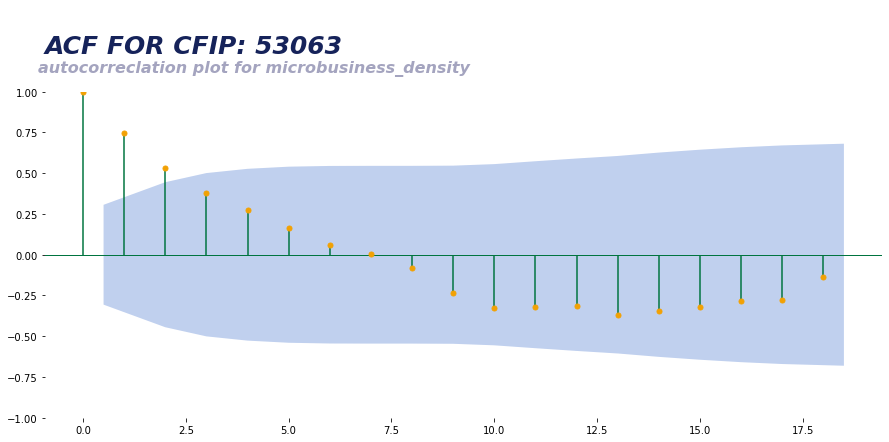

D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


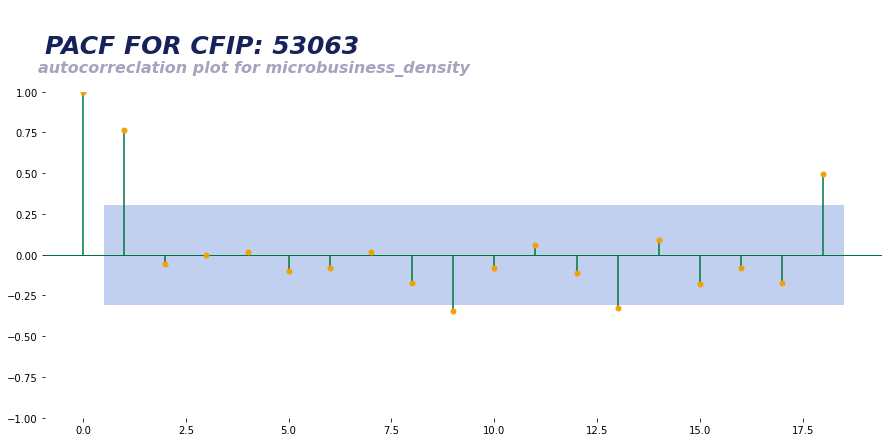

In [21]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

def plot_acf_colors(ax, markercolor="red", linecolor="black", facecolor="silver", barcolor="darkorange", linewidth=1):
    """utility function to get some control over colors with  plot_acf()"""
    from statsmodels.graphics.tsaplots import plot_pacf
    from statsmodels.graphics.tsaplots import plot_acf
    from matplotlib.collections import PolyCollection, LineCollection
    for item in ax.collections:
        # change the color of the confidence interval 
        if type(item) == PolyCollection:
            item.set_facecolor(facecolor)
        # change the color of the vertical lines
        if type(item) == LineCollection:
            item.set_color(barcolor)
    # change the color of the markers
    [line.get_label() for line in ax.lines]
    for item in ax.lines:
        item.set_color(markercolor)
    # change the color of the horizontal lines
    ax.lines[0].set_color(linecolor)
    ax.lines[0].set_linewidth(linewidth)
    #ax.lines.remove(ax.lines[0])
    return ax

def plot_acfpacf(acf_pacf_OBJ,df,title,cfip):
    f, ax = plt.subplots(figsize=(15, 6))
    ax.set_title( f"\n{title} FOR CFIP: {cfip}", fontname='Ubuntu', fontsize=25,
                fontstyle='italic', fontweight='bold',
                color='#16235A',loc='left',y=1.1, pad=-14)

    ax.text(-1.1, 1.12, 'autocorreclation plot for microbusiness_density ', 
            style='italic',fontweight='bold',fontsize=16,color='#A4A4BF')

    for pos in ['right','top','left','bottom']:
        ax.spines[pos].set_visible(False)
    acf_pacf_OBJ(df,title=None, lags=18, ax=ax)

    ax = plot_acf_colors(ax,markercolor="#F2A104", linecolor="#00743F", facecolor="#0444BF", barcolor="#00743F")
    plt.show()
    print()
cfip = 53063
df = train.loc[train.cfips==cfip,'microbusiness_density'].values
plot_acfpacf(plot_acf,df,'ACF',cfip)
plot_acfpacf(plot_pacf,df,'PACF',cfip)


<h1 style="font-family: 'Georgia', serif;font-weight: bold;margin: 2rem 0 1rem 0;line-height: 1.2;color: #16235A;">WHAT'S MORE?  <a class='anchor' id='more'></a><a href="#top"> ↑</a></h1>


<p style="font-size:18px; font-family:Georgia; line-height: 1.5em;color:#6975A6;">
   Due to time and space constraints, I will stop here for now. For anomaly detection, in addition to the above methods, you can also consider using packages such as Ruptures and Prophet. Of course, to achieve more accurate anomaly detection, you may need to use multiple methods, such as voting, stacking, or combinations. Additionally, you can see here that this is only 1/5th of my project progress. In future notebooks, I will cover:<b style='color:black'> 1. How to build effective offline models, especially in this competition; 2. How to construct useful features; 3. Traditional models and some testing; 4. Identifying patterns in the data. 5. How to use detected anomalies to construct features.</b>
<p style="font-size:18px; font-family:Georgia; line-height: 1.5em;color:#6975A6;">
<!--     <br> -->
<h3 style="font-family: 'Georgia', serif;font-weight: bold;margin: 2rem 0 1rem 0;line-height: 1.2;color: #16235A;">FINALLY!!! PLEASE UPVOTE IF YOU LIKE IT. I welcome any feedback you may have on this topic. Please share your thoughts in the comments below and let's start a discussion; and,and,If you are familiar with WeChat, you can scan the QR code to follow my blog on WeChat. </h3>

    
<center>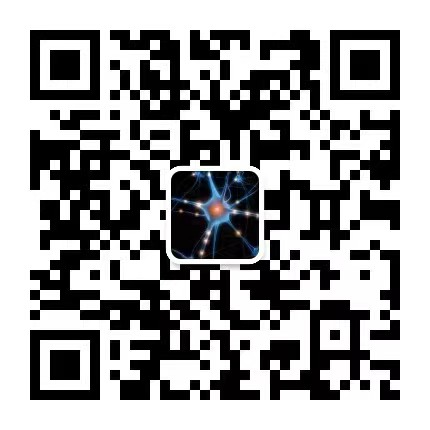</center>
